In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv') 

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical variables
print(df.describe())


   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

In [2]:
# Handle missing values 
# Impute missing numerical values with mean
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert categorical variables to the appropriate data type
# For demonstration, let's convert categorical variables to 'category' type
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify the changes
# Check for missing values again
print(df.isnull().sum())

# Check the data types of variables
print(df.dtypes)


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

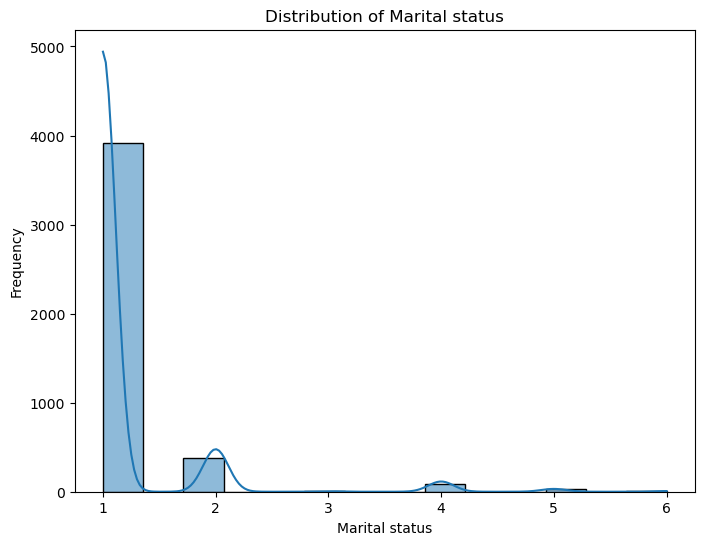

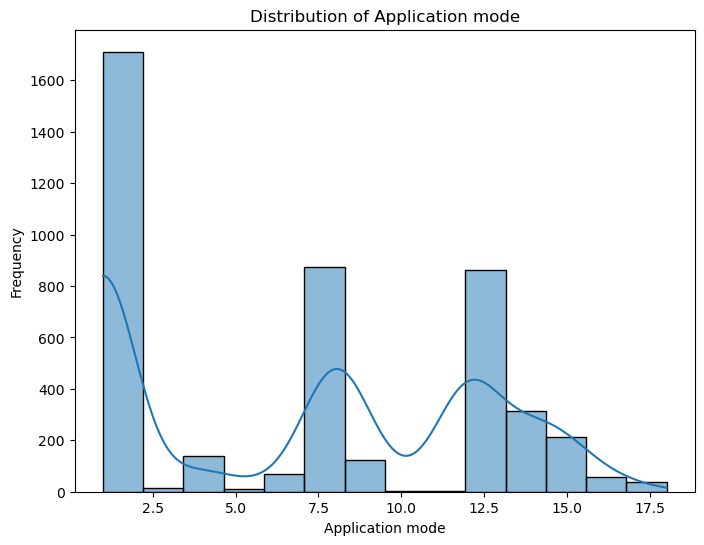

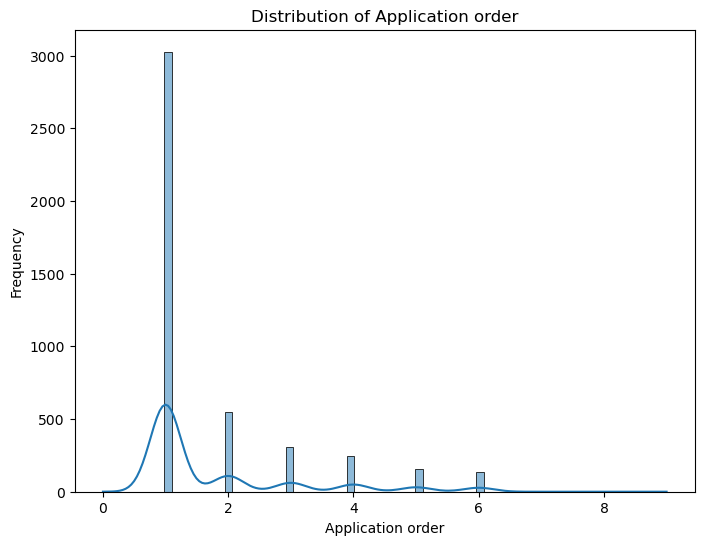

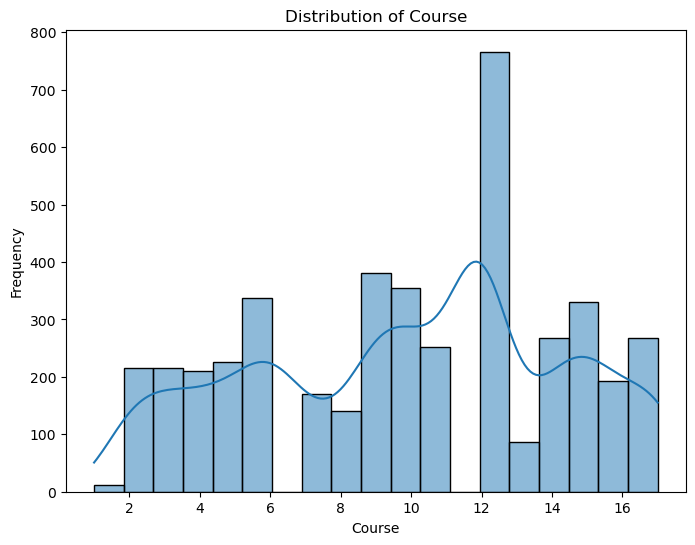

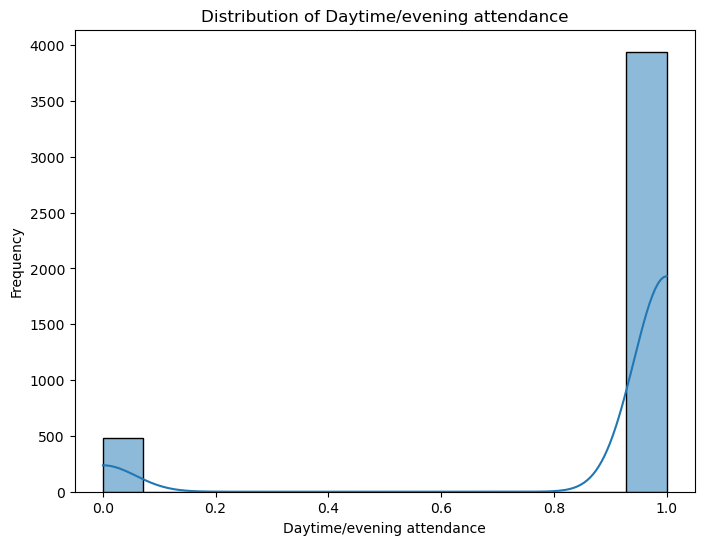

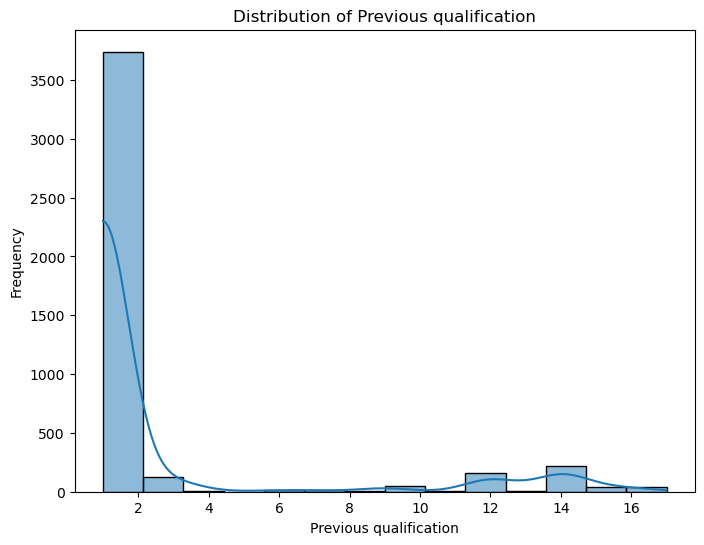

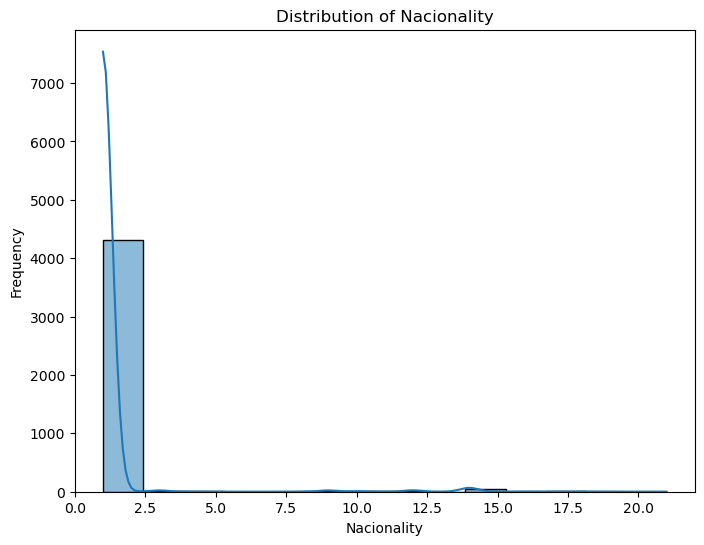

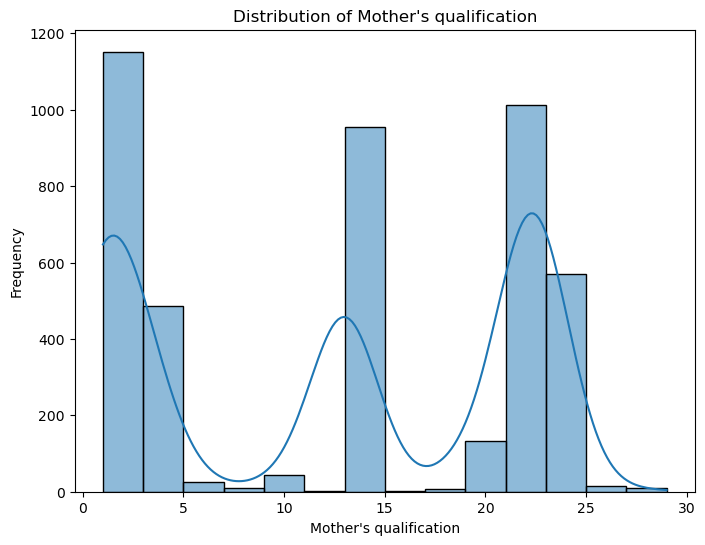

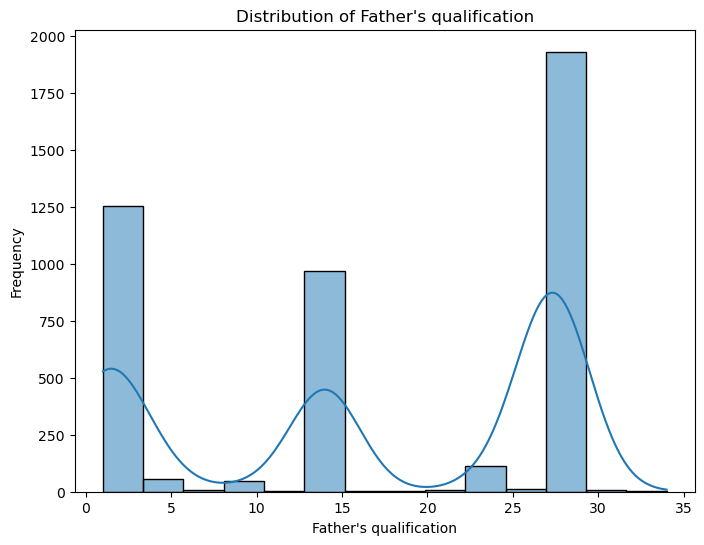

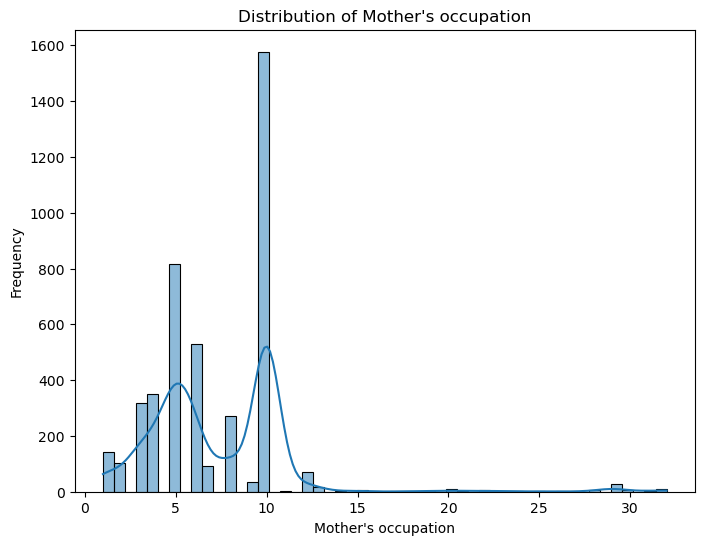

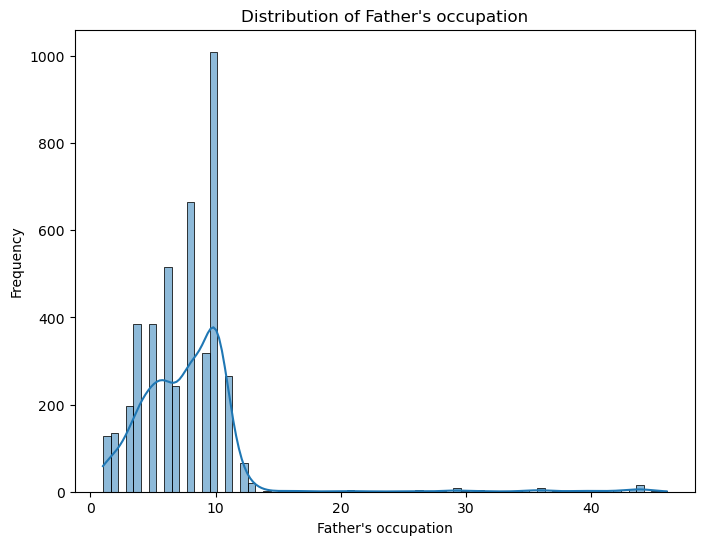

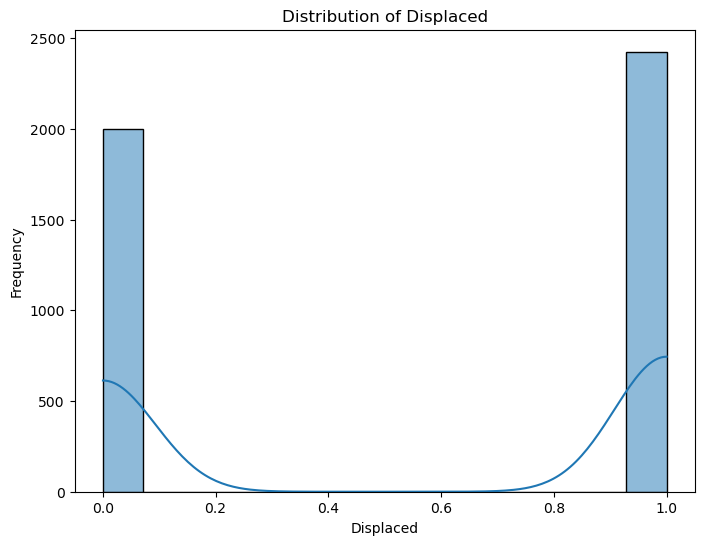

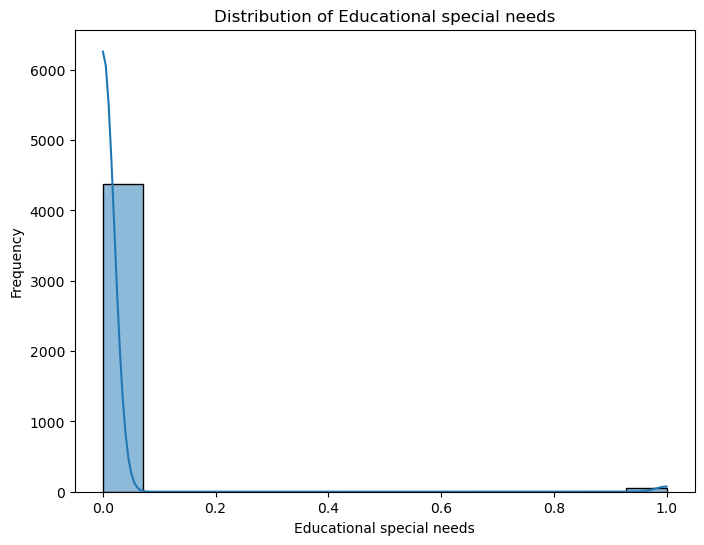

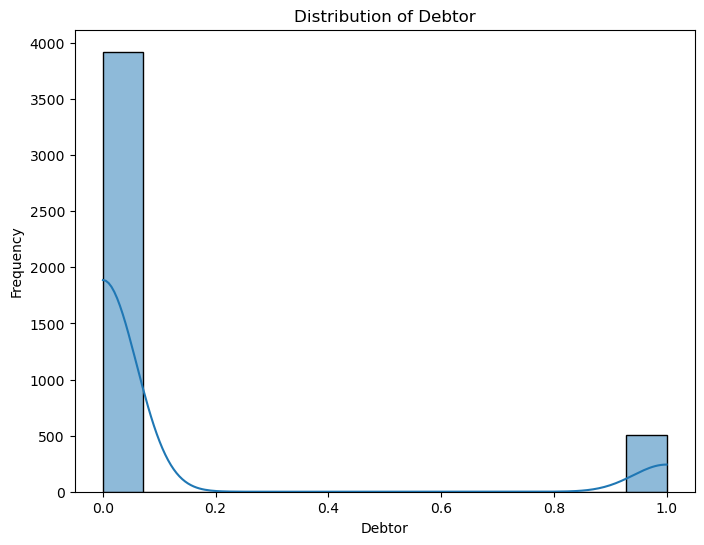

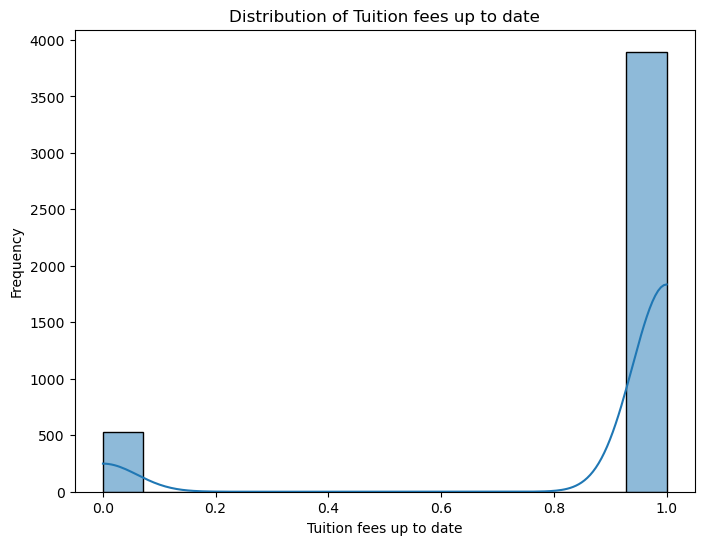

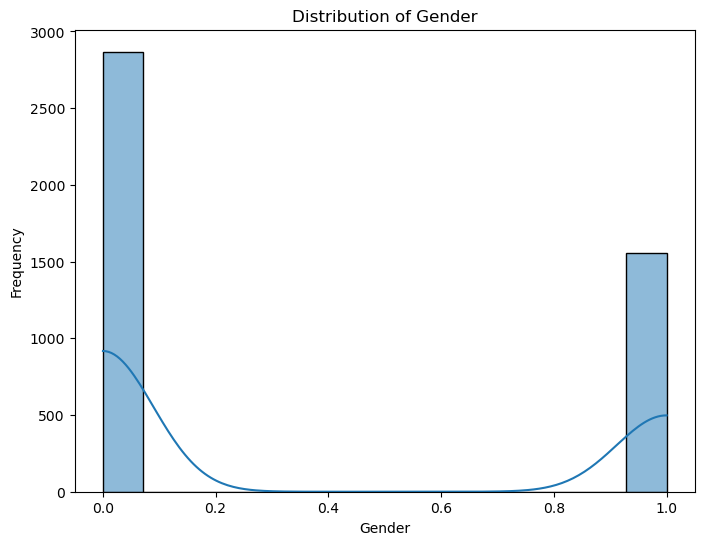

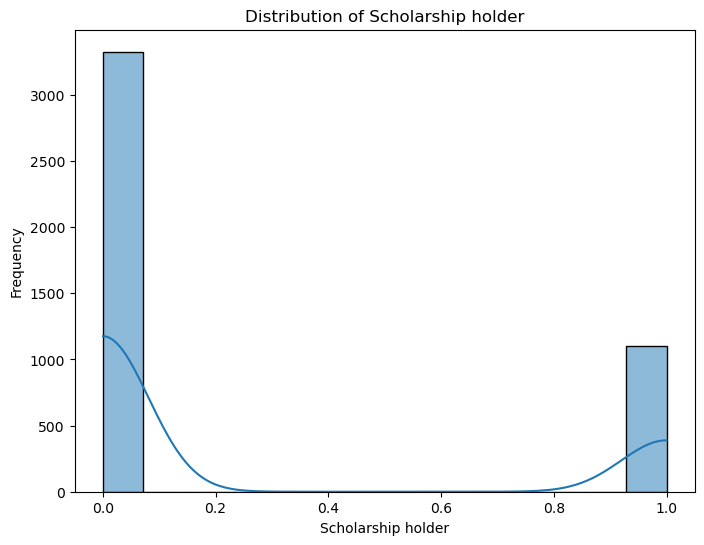

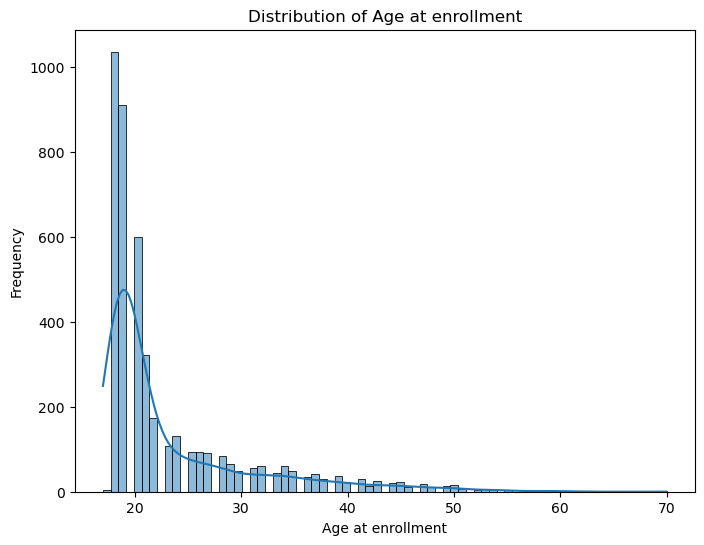

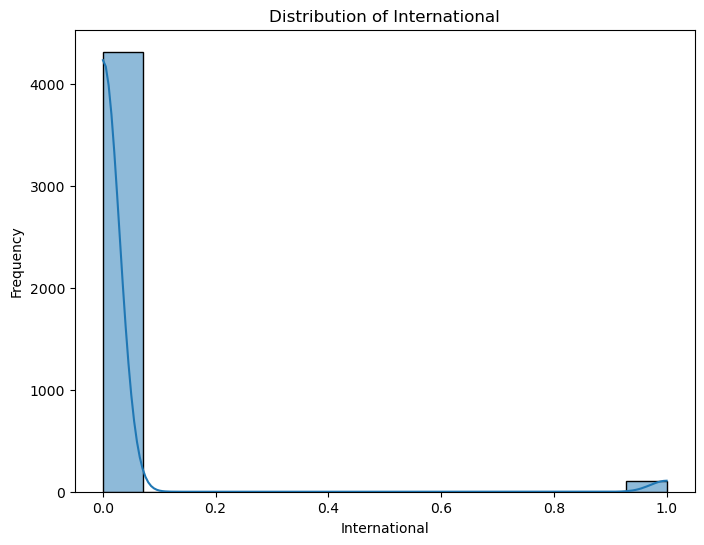

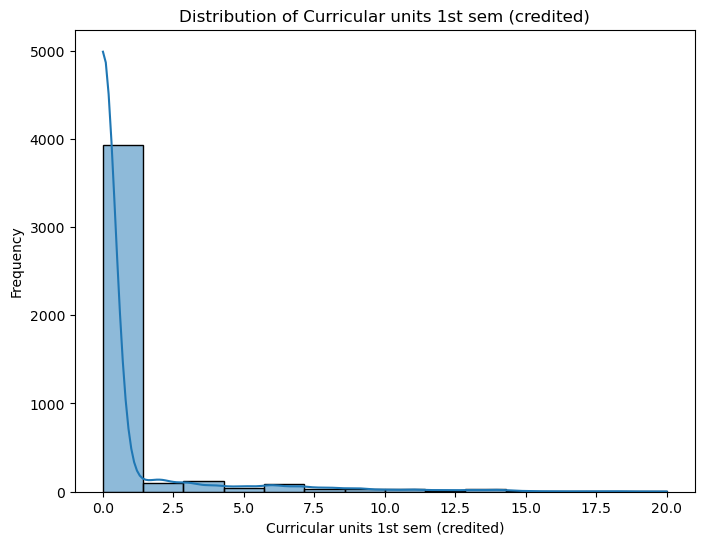

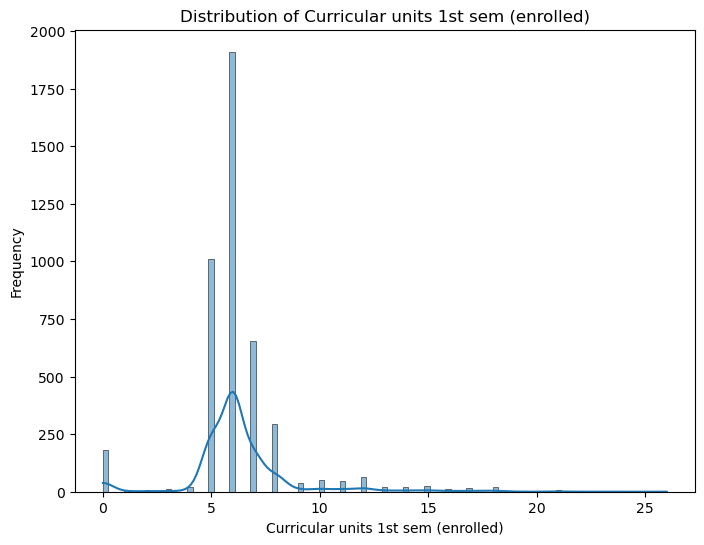

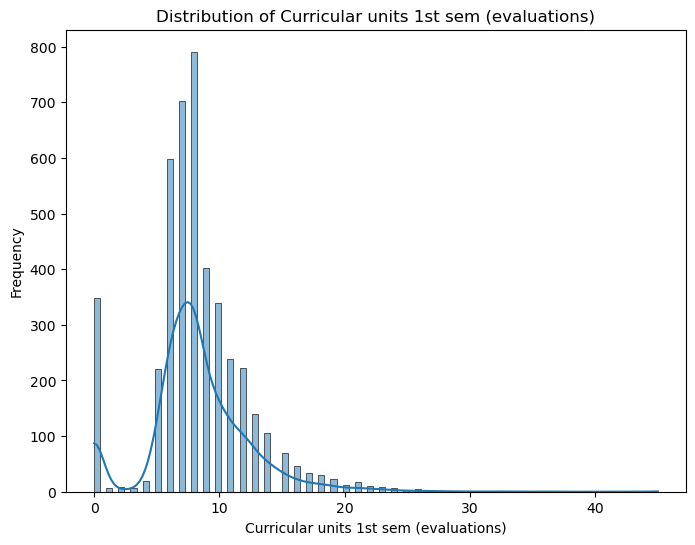

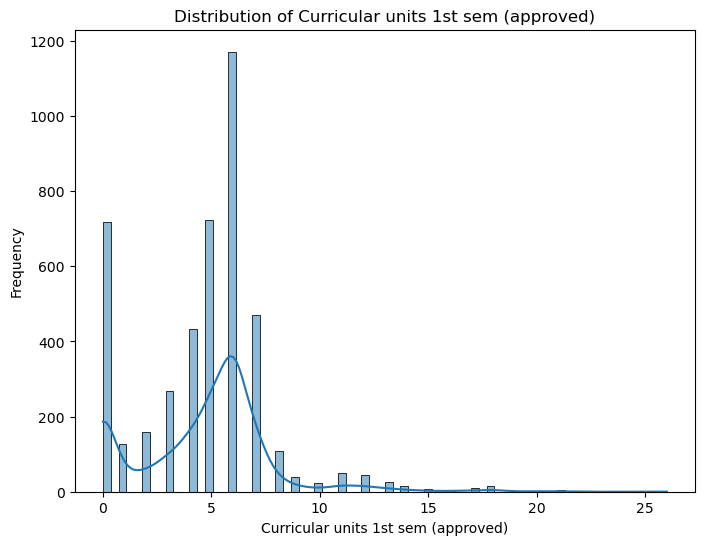

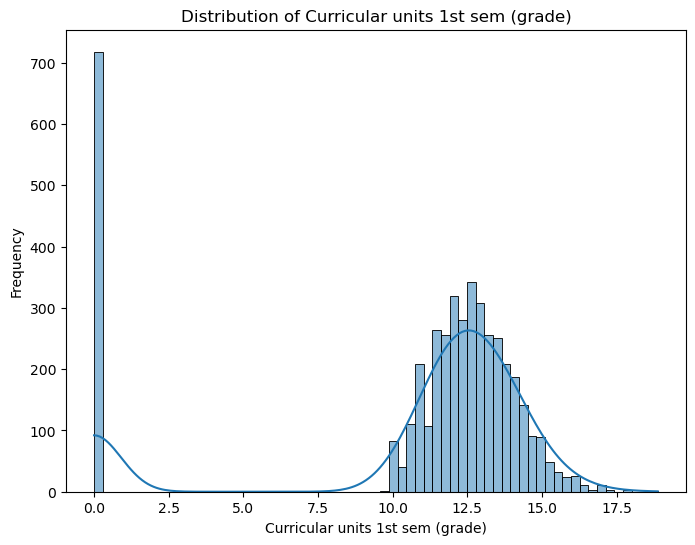

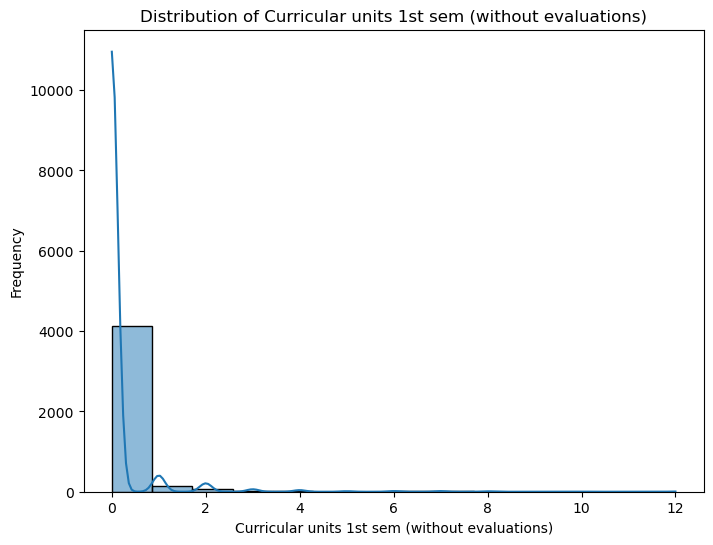

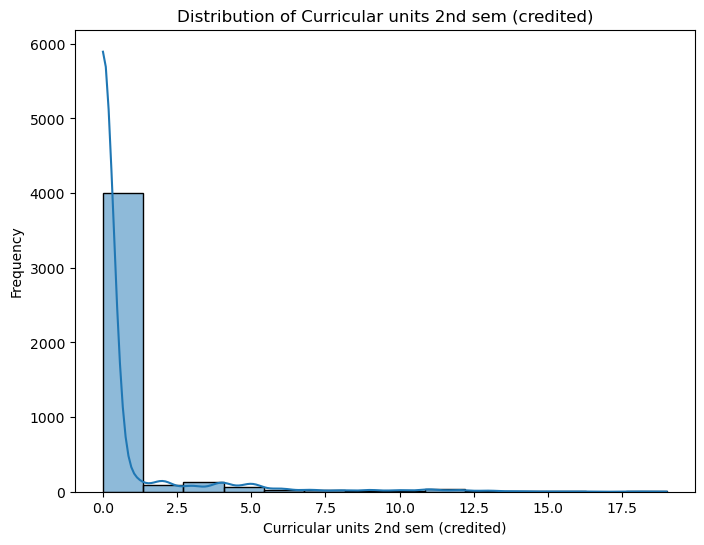

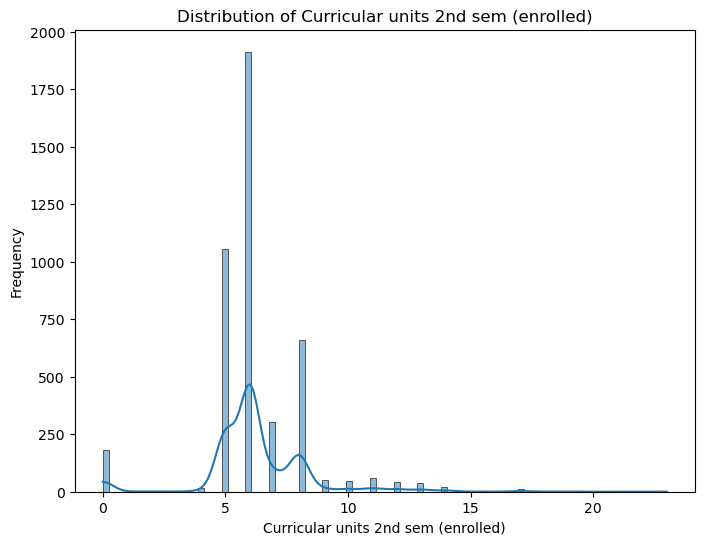

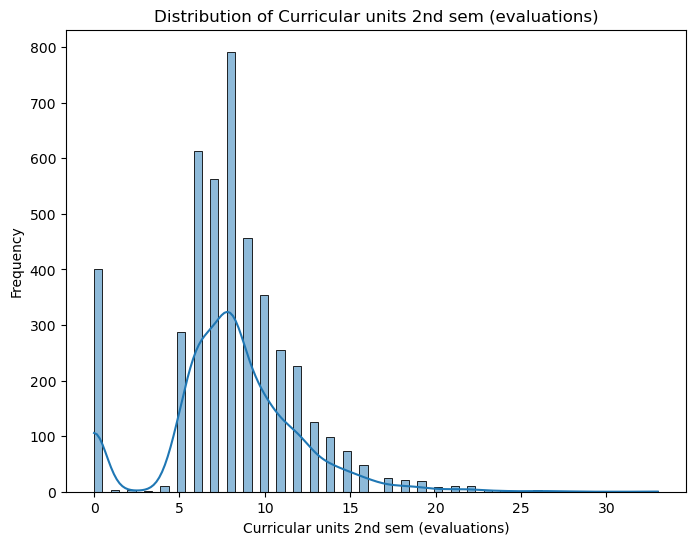

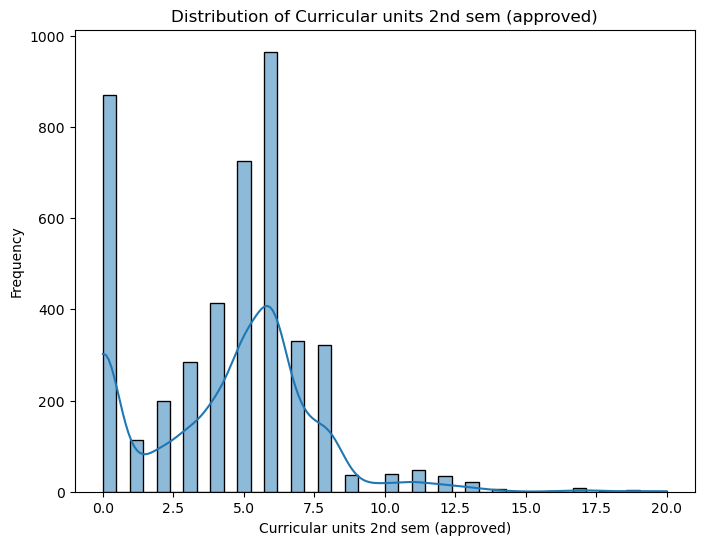

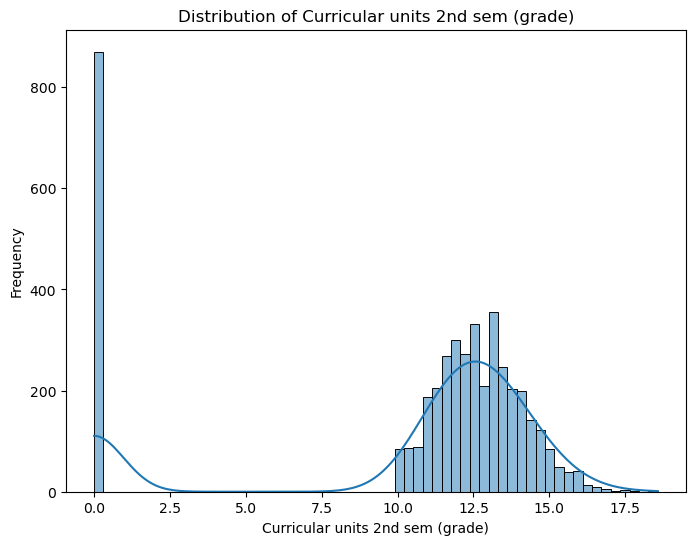

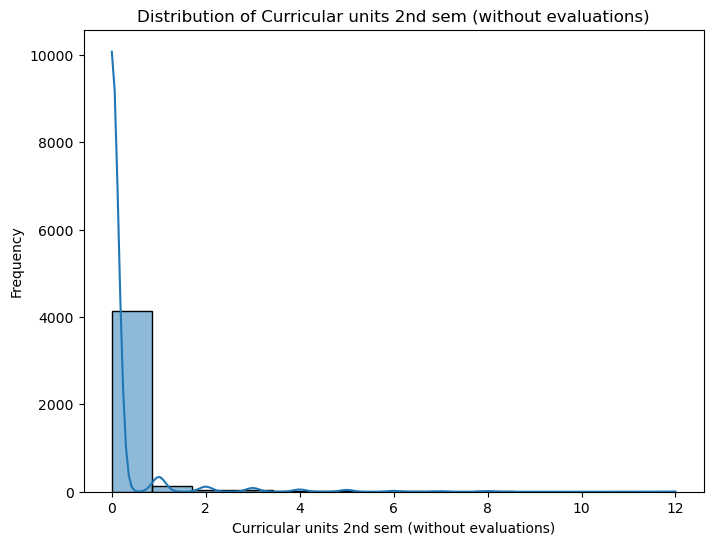

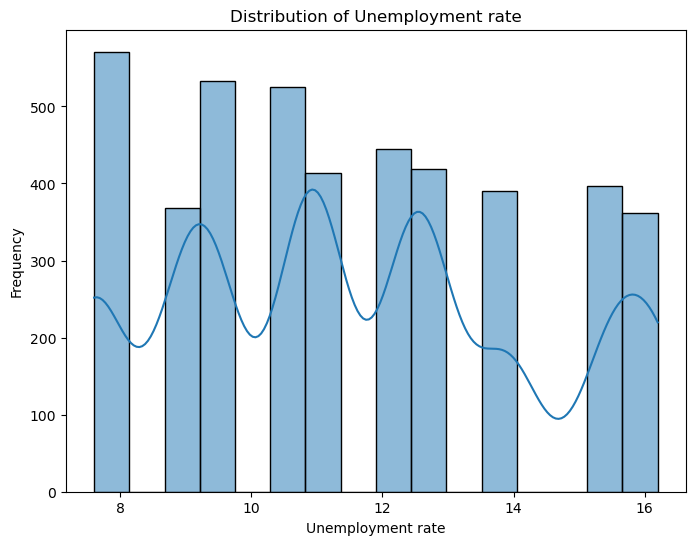

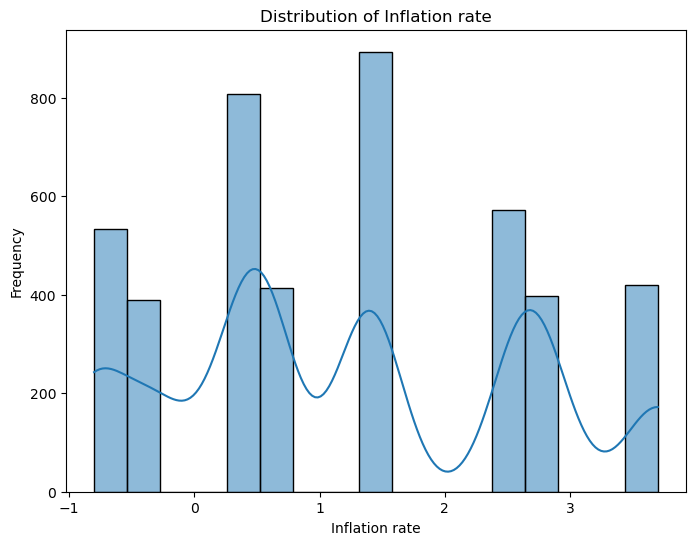

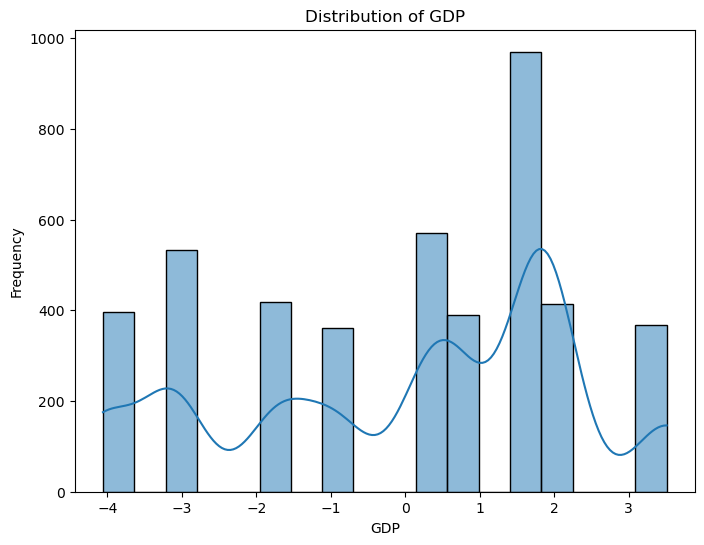

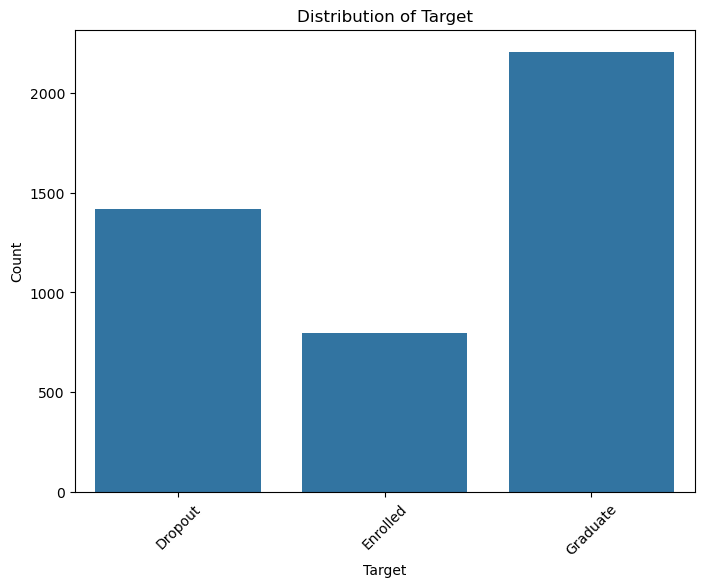

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Explore the distribution of categorical features
categorical_cols = df.select_dtypes(include='category').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


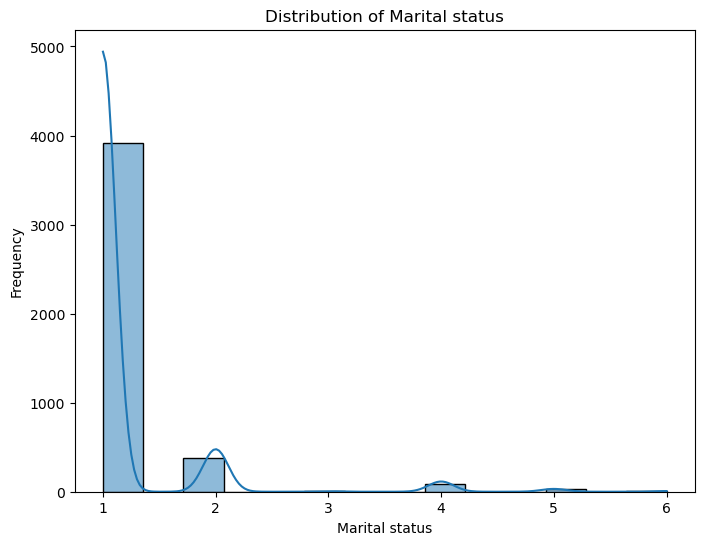

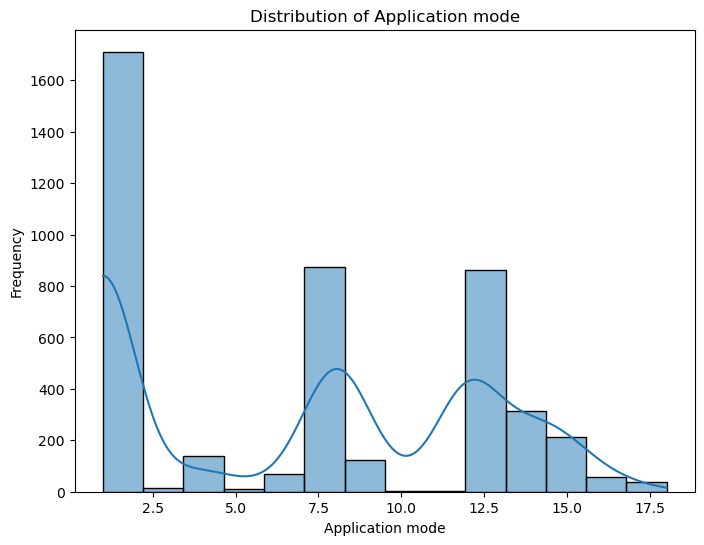

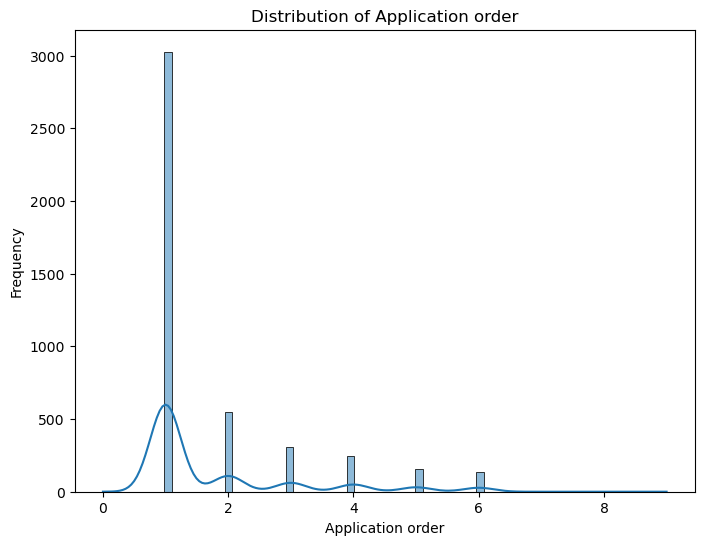

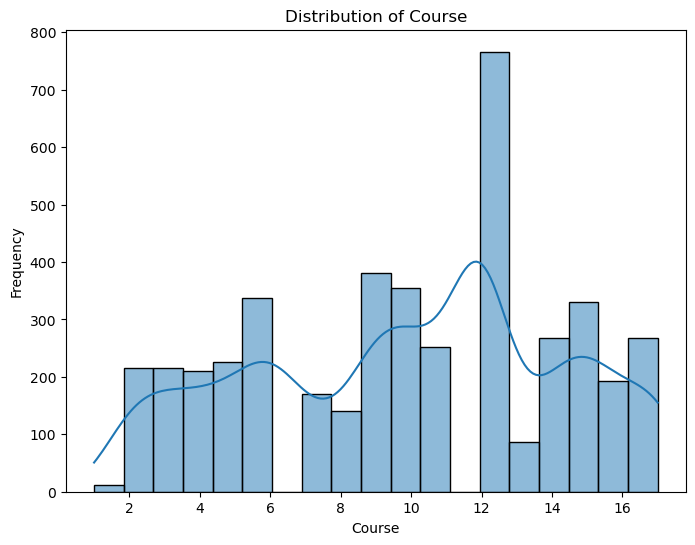

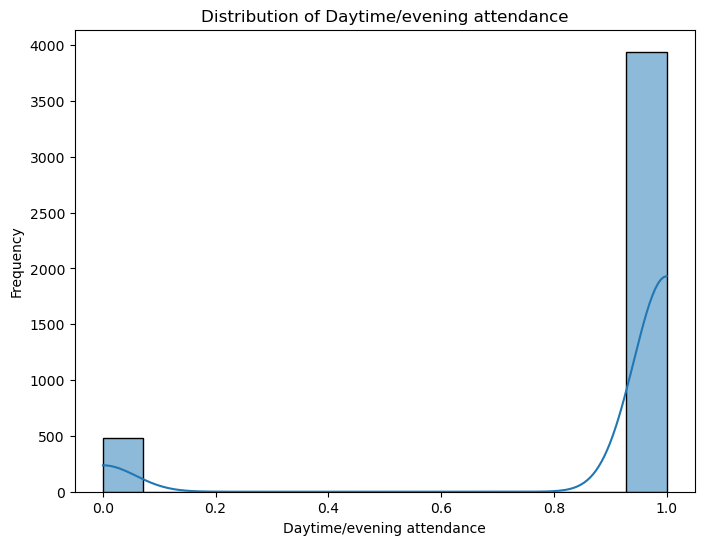

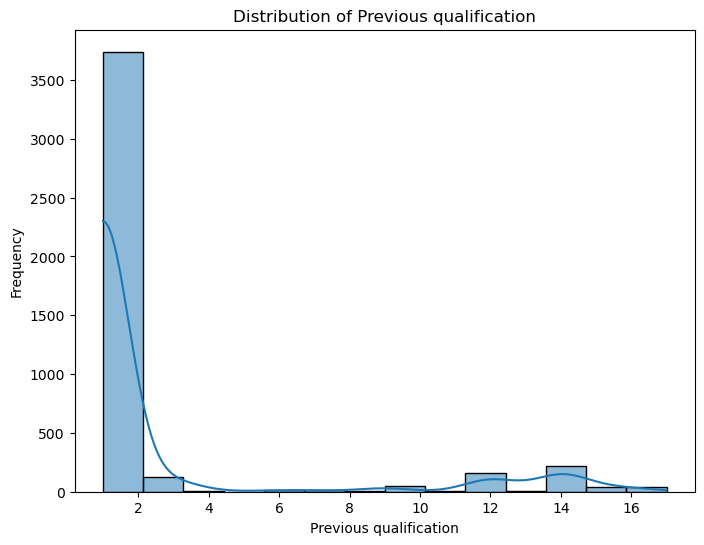

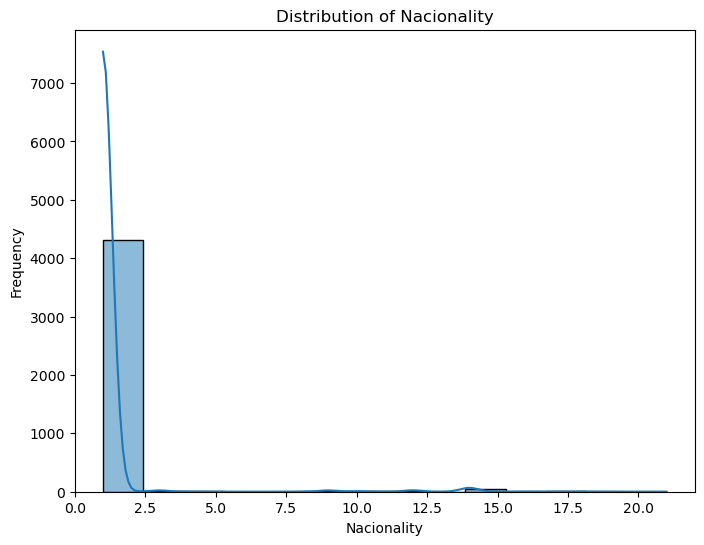

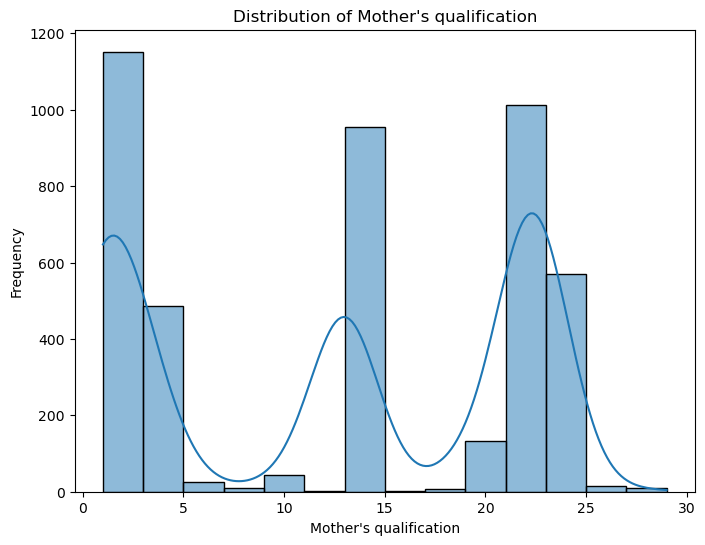

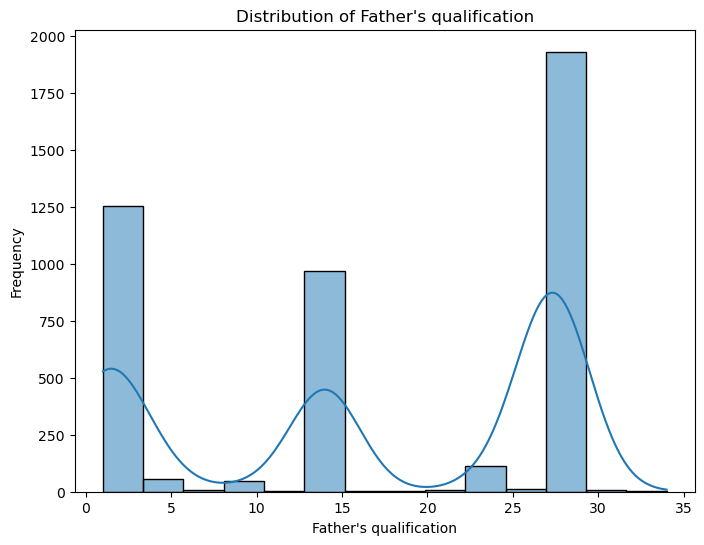

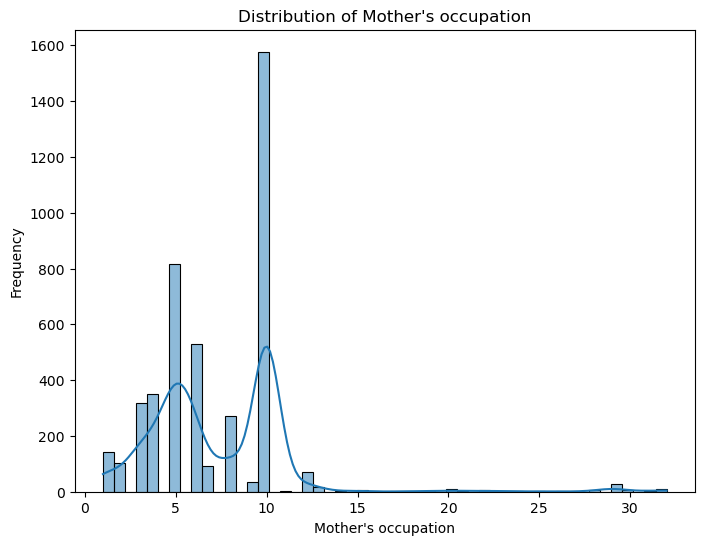

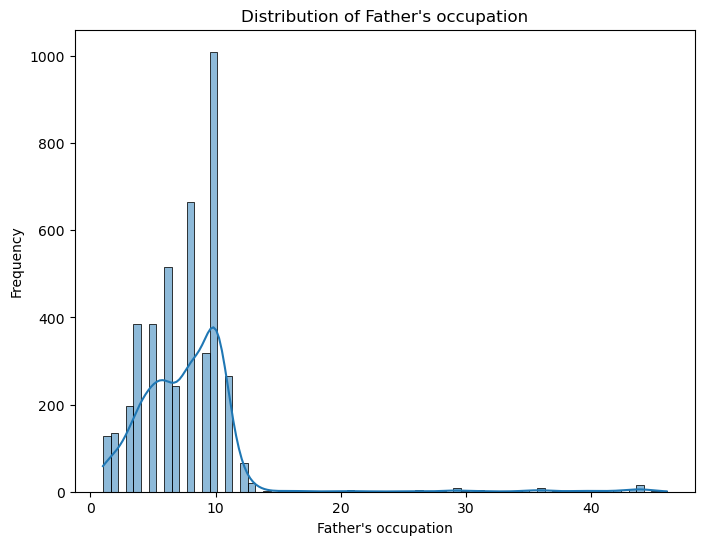

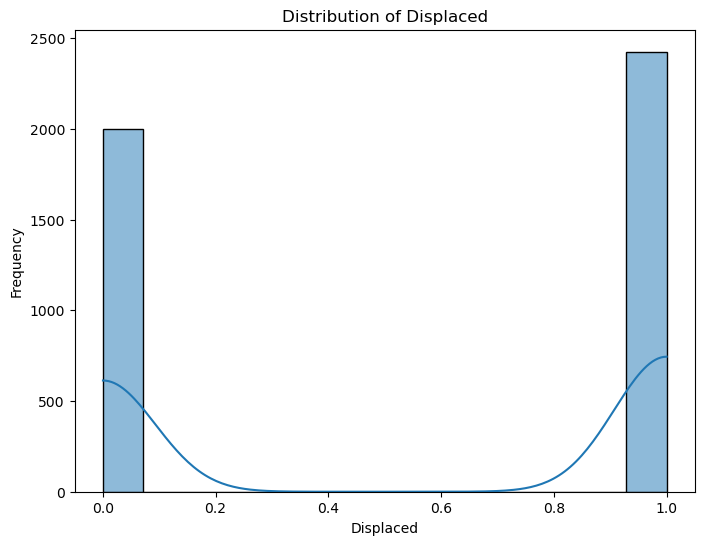

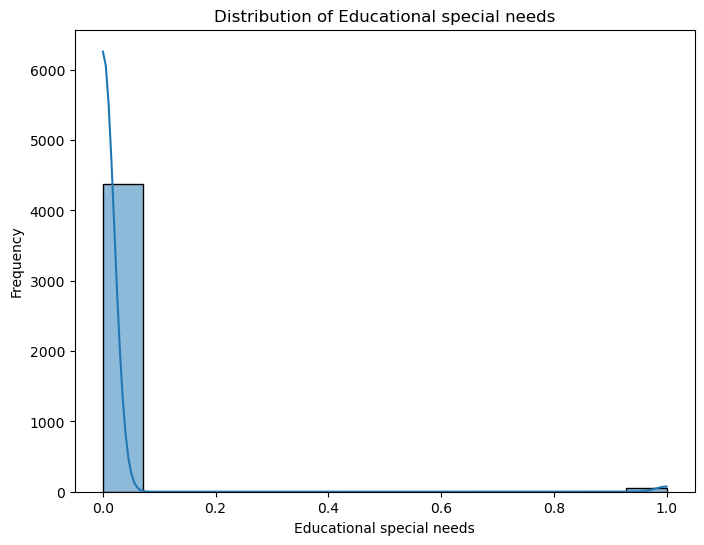

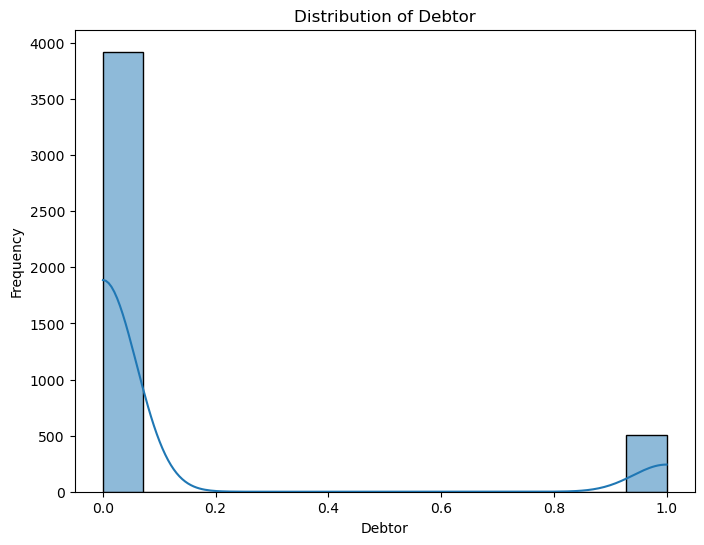

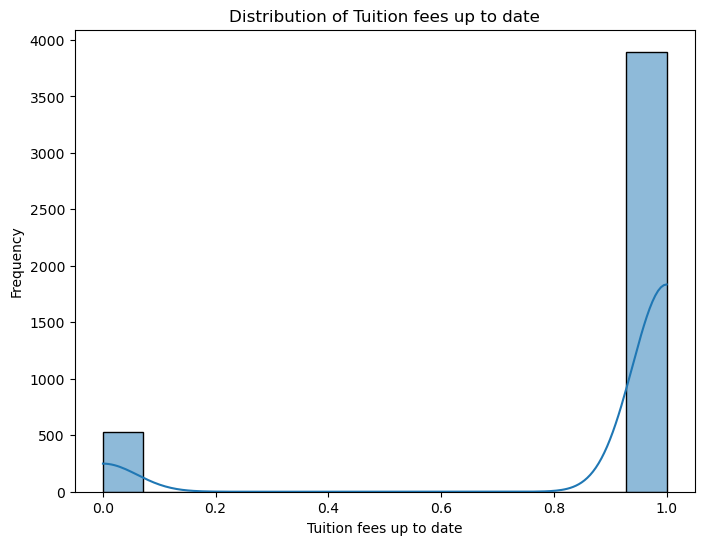

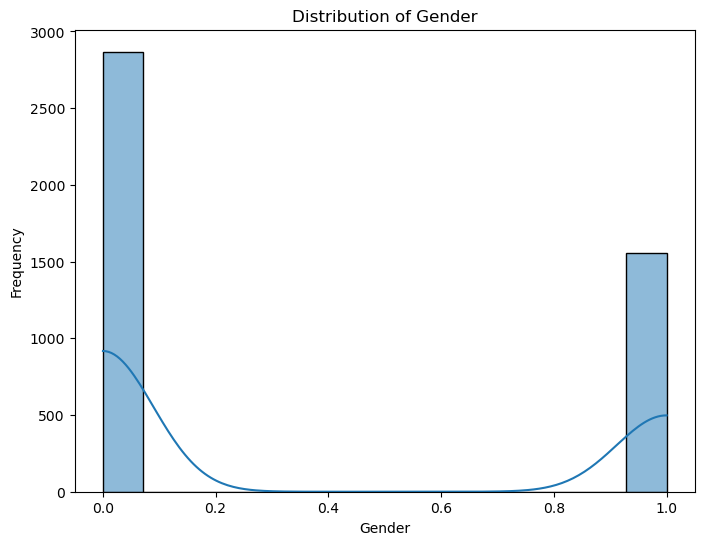

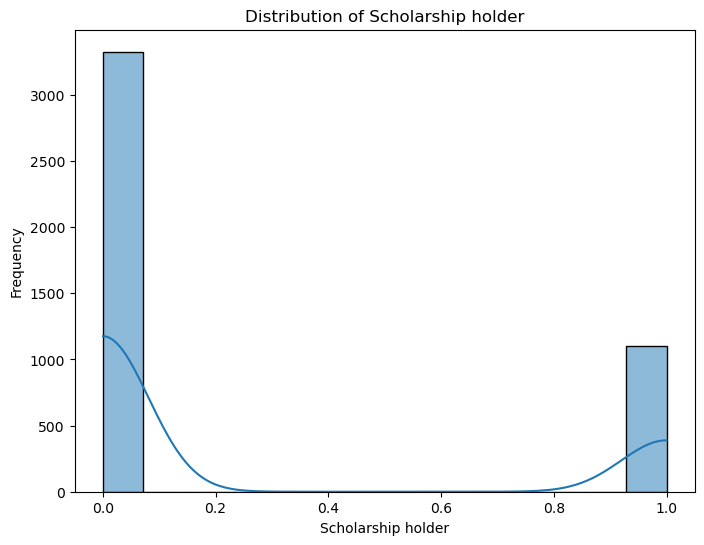

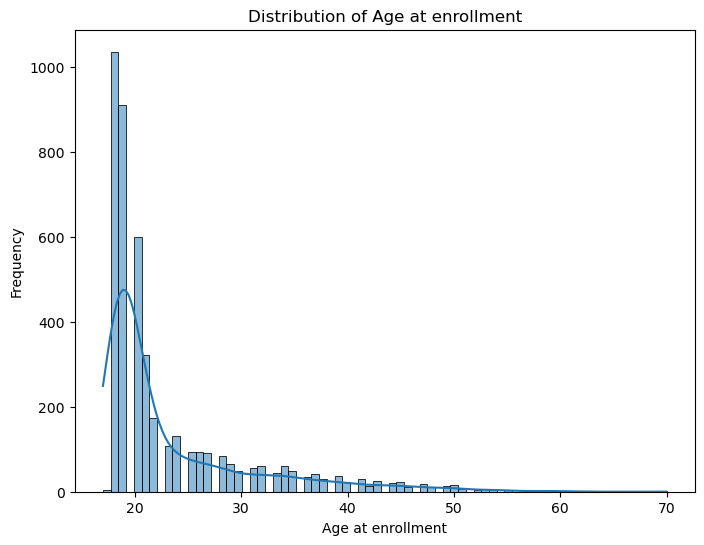

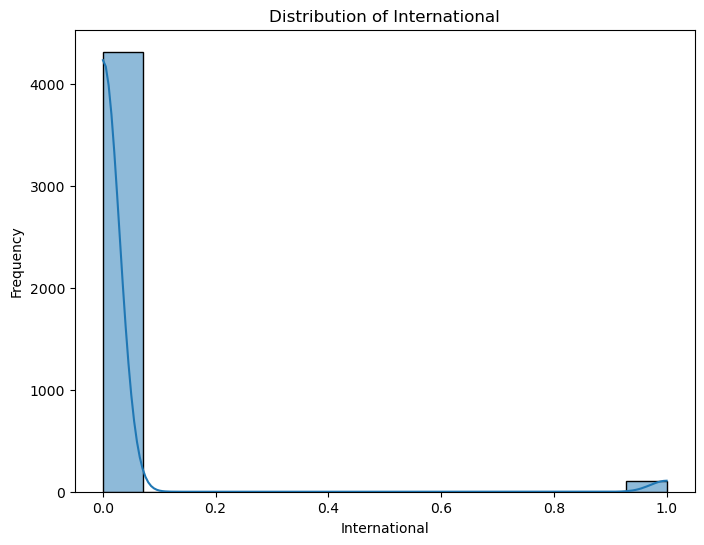

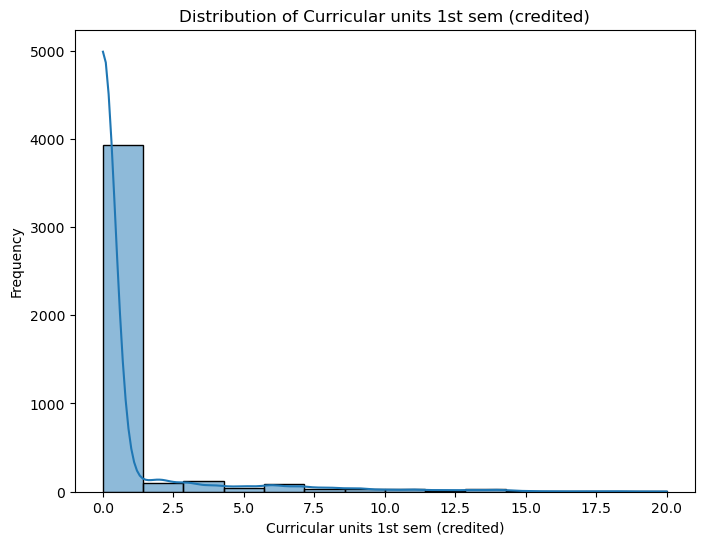

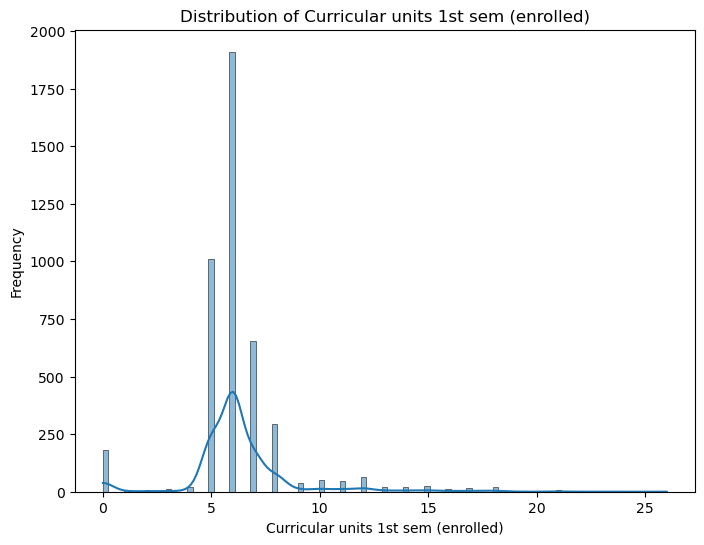

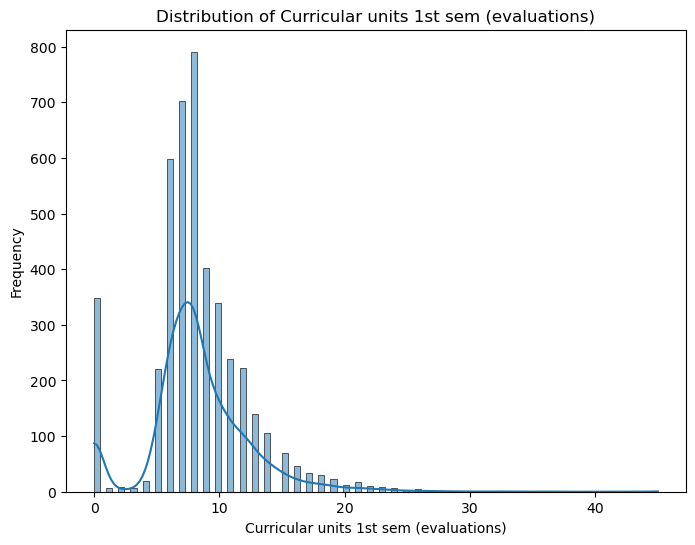

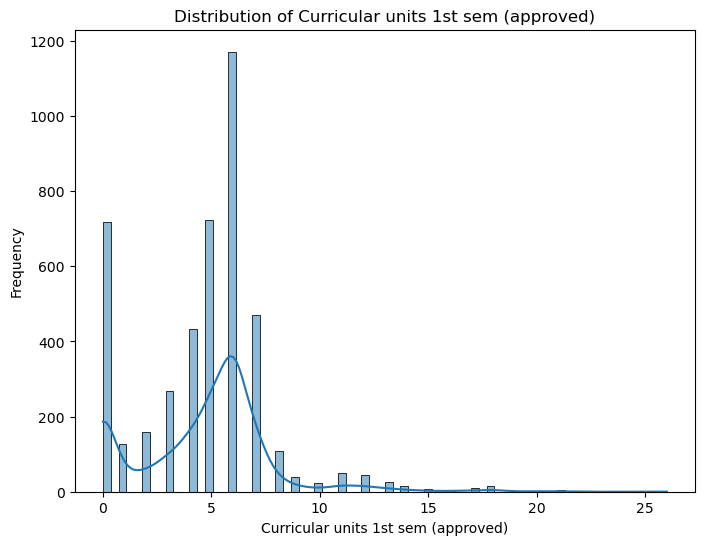

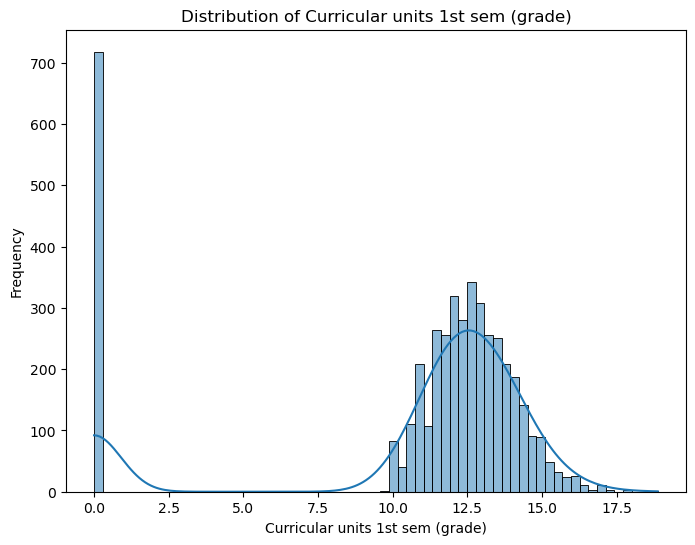

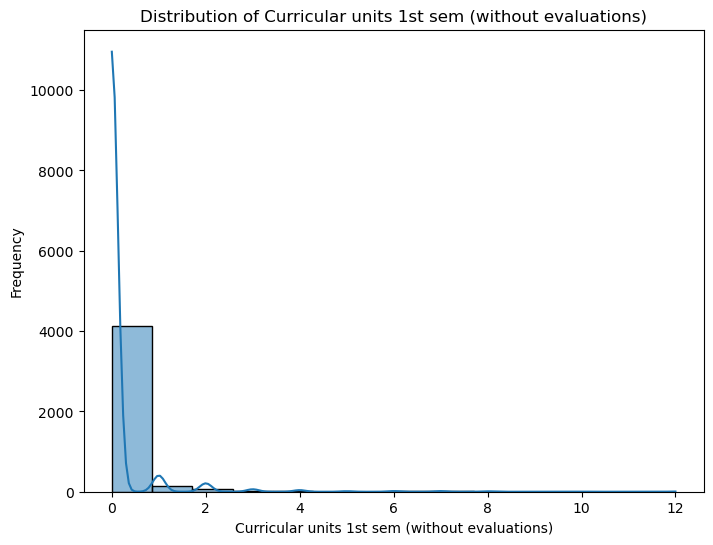

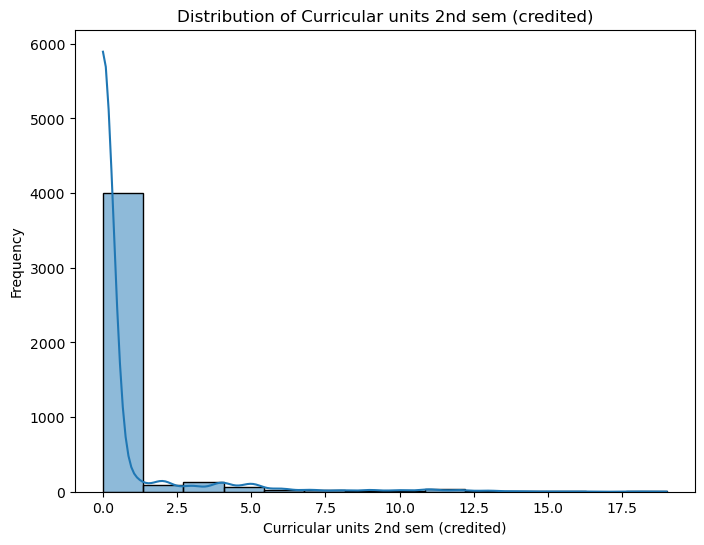

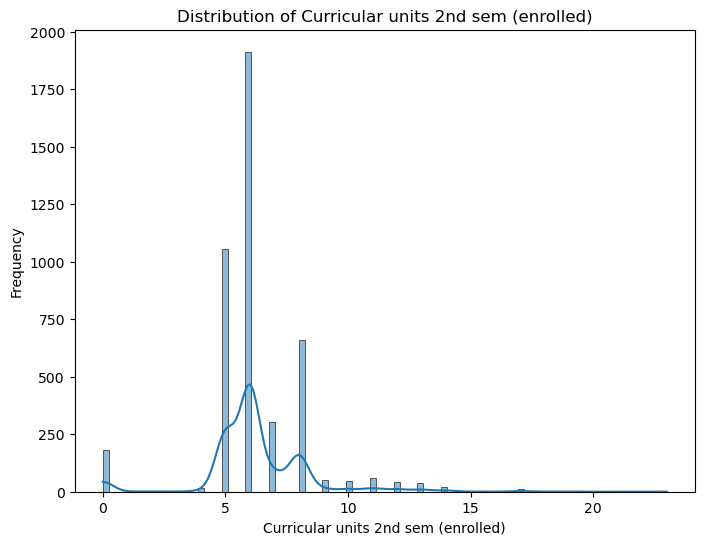

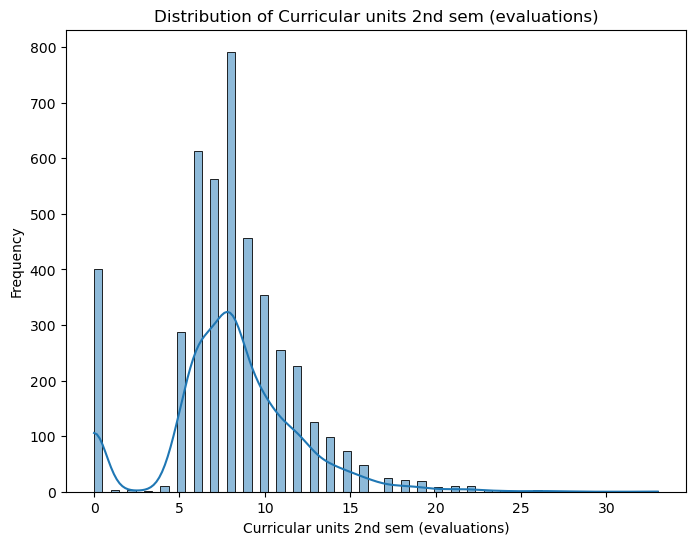

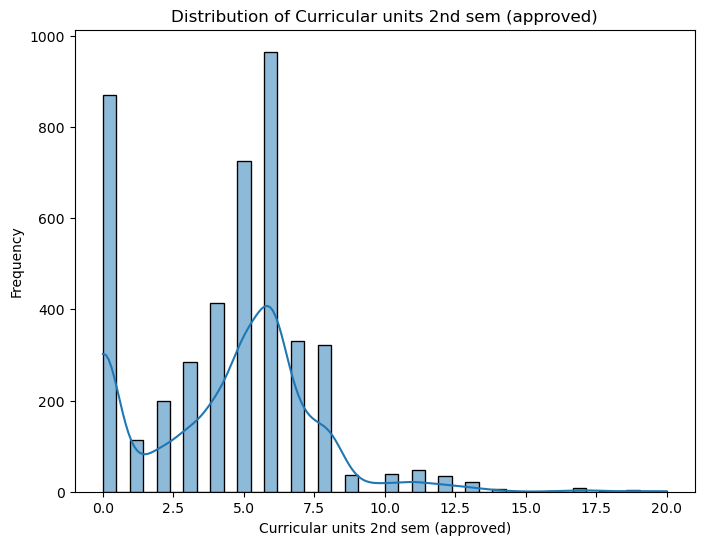

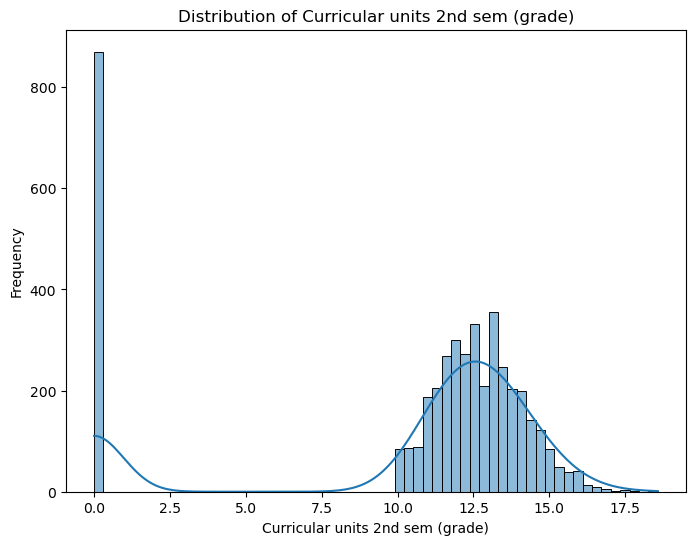

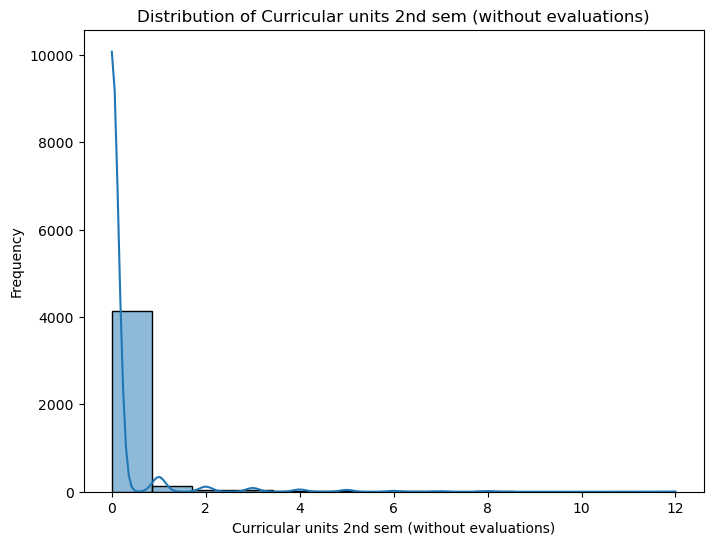

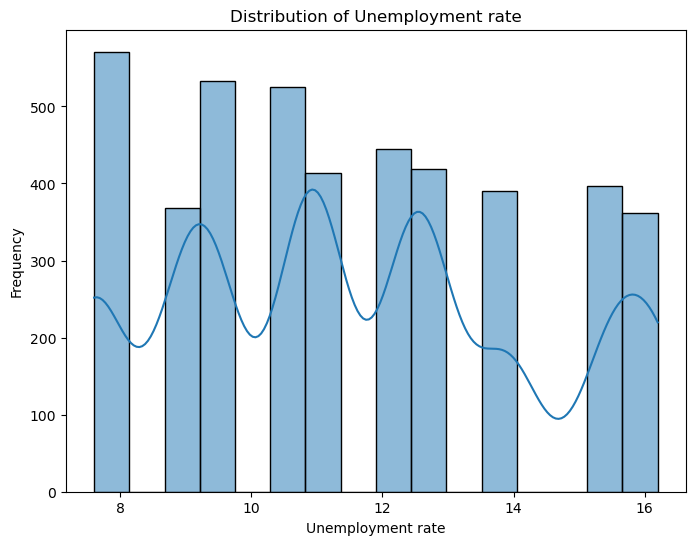

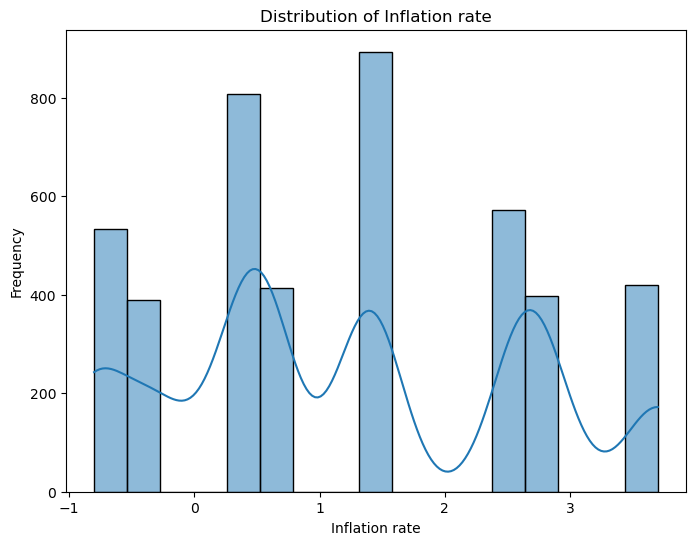

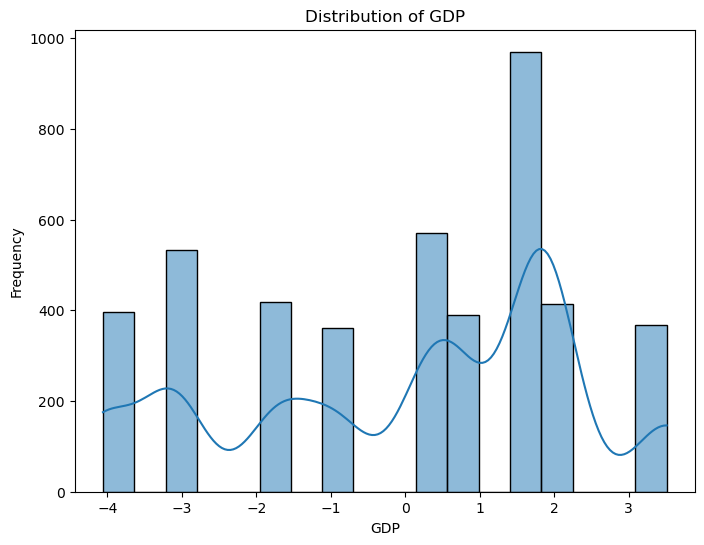

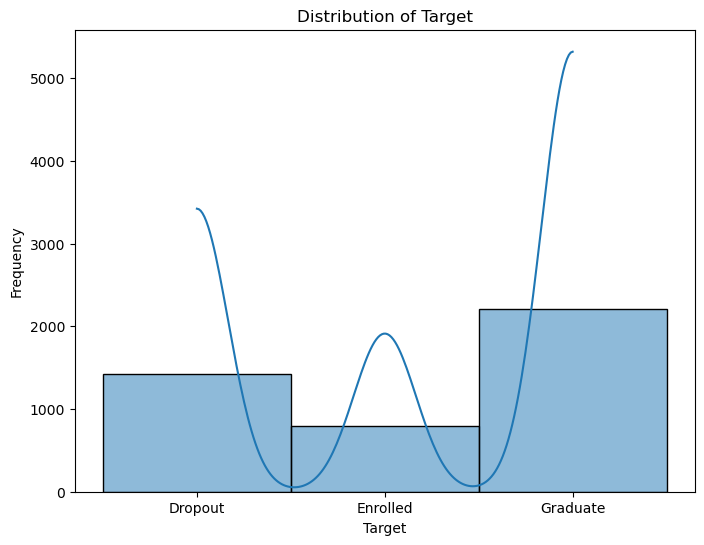

In [4]:
# Univariate Analysis
for col in df.columns:
    plt.figure(figsize=(8, 6))
    if df[col].dtype == 'object':  # For categorical variables
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=45)
    else:  # For numerical variables
        sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


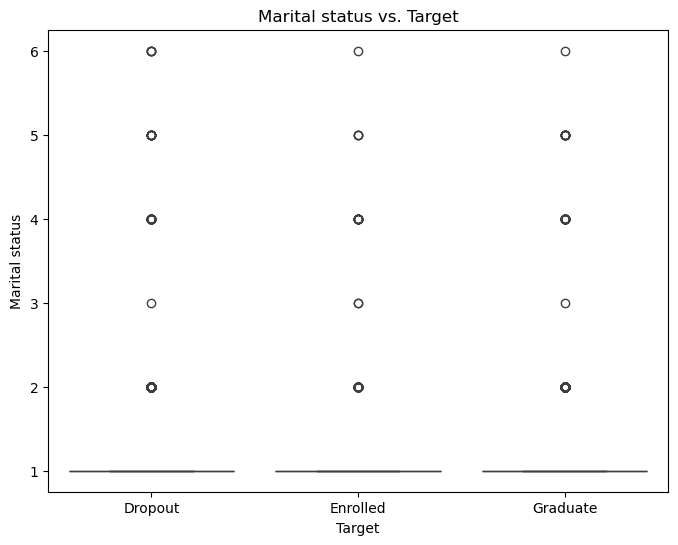

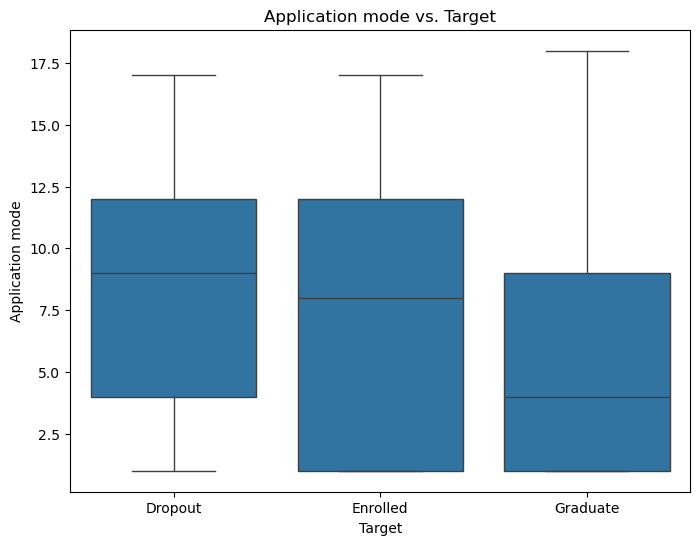

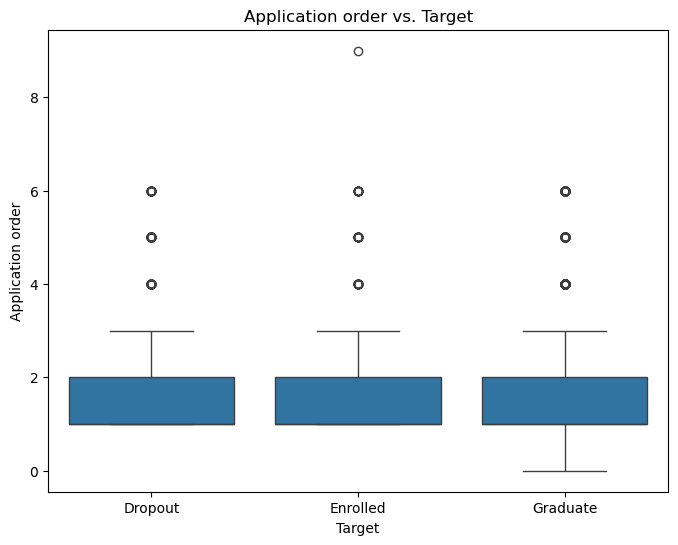

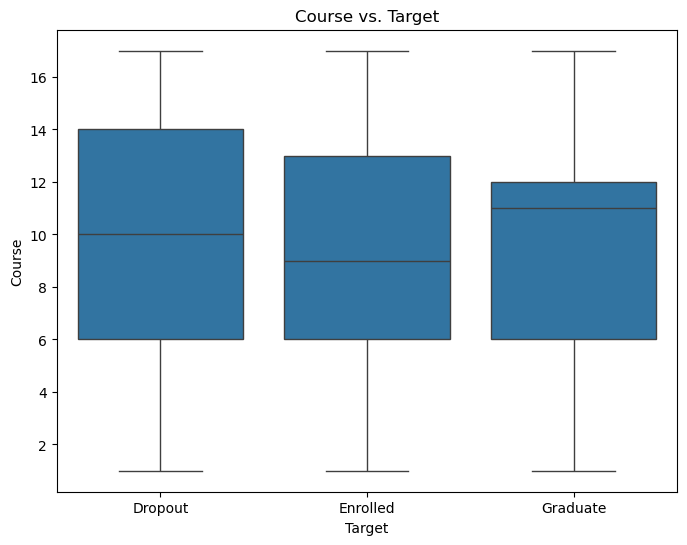

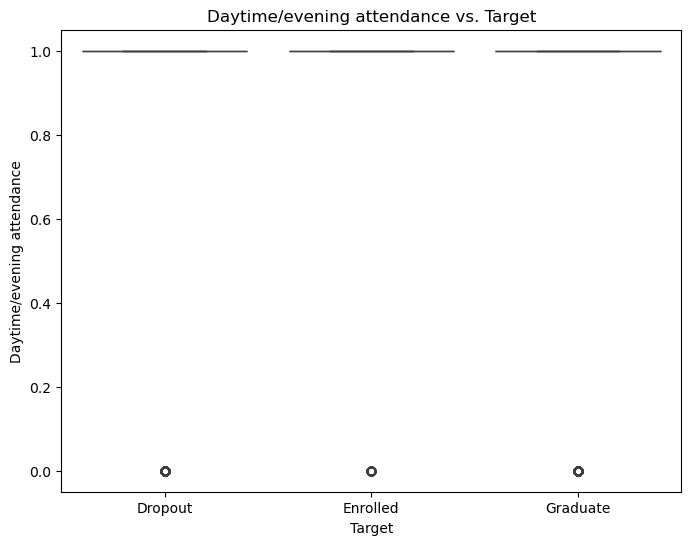

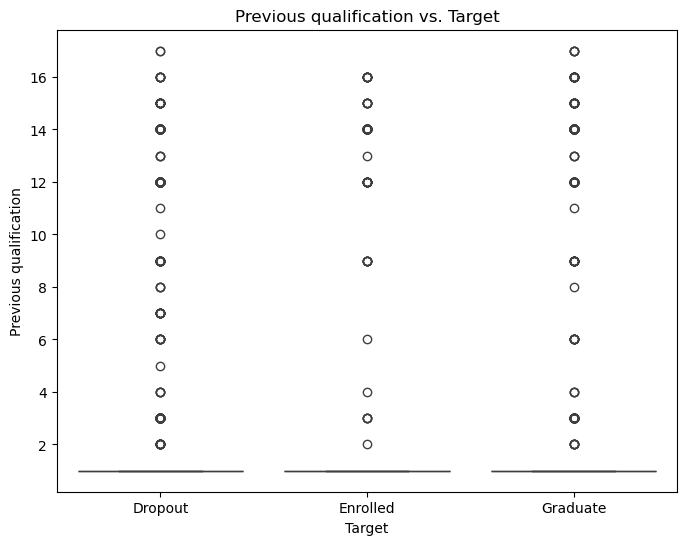

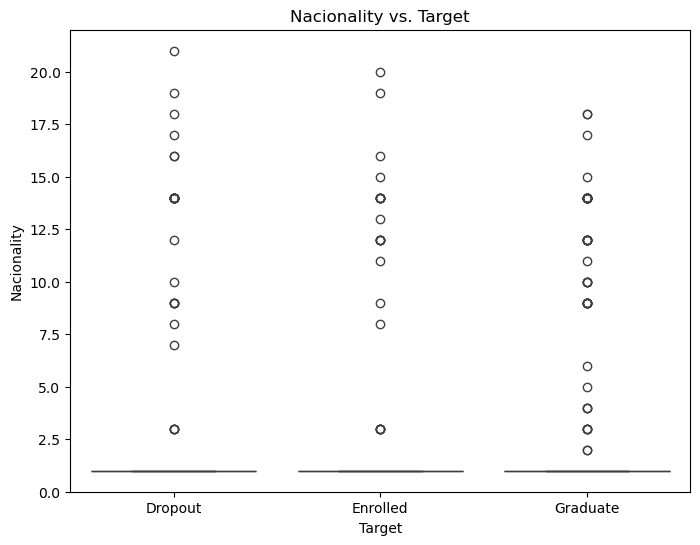

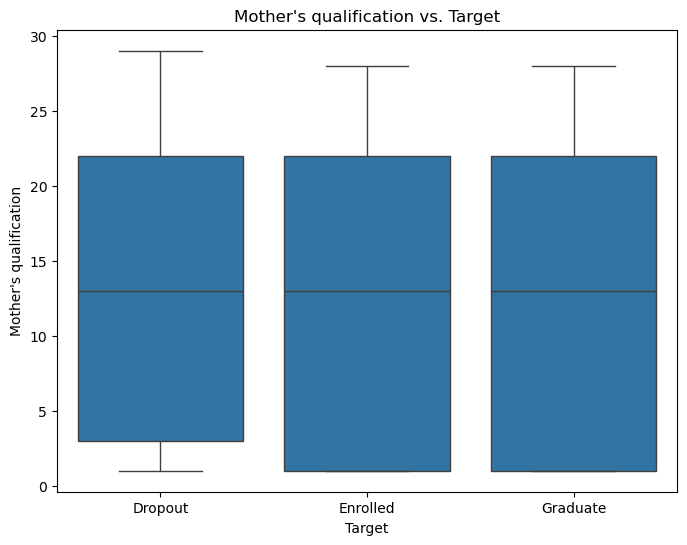

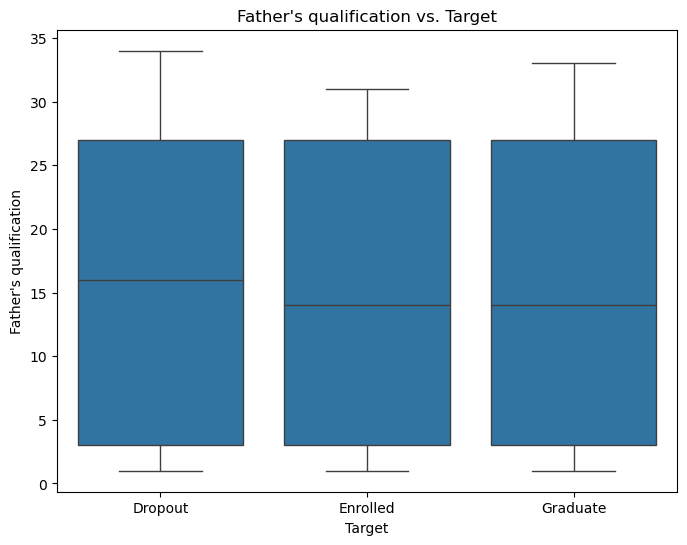

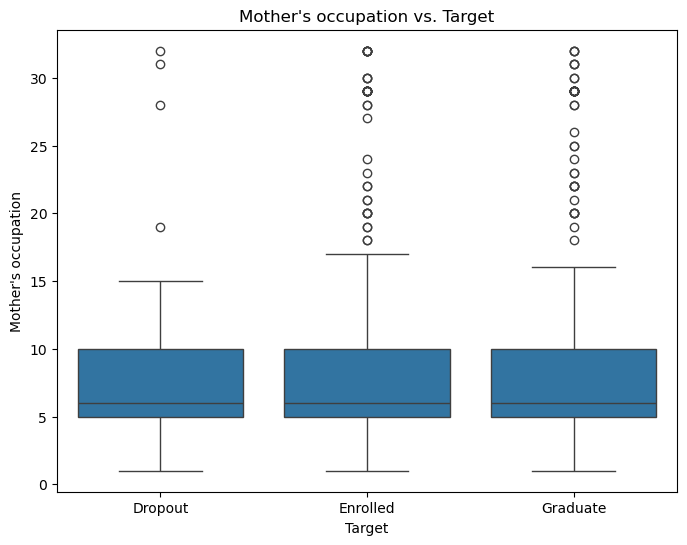

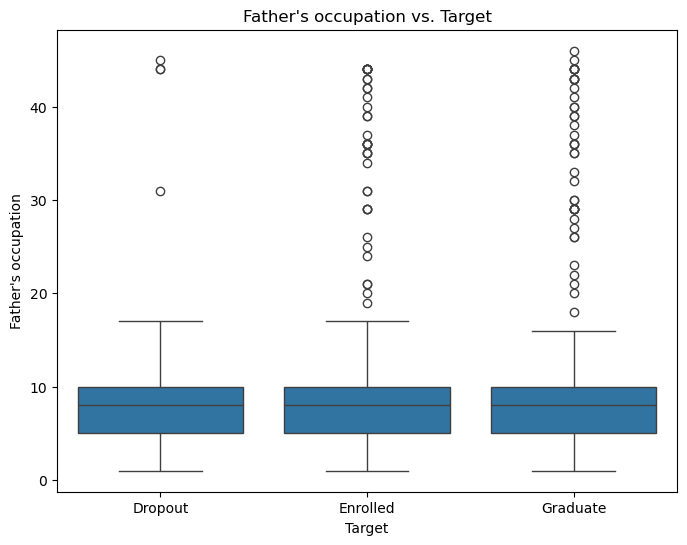

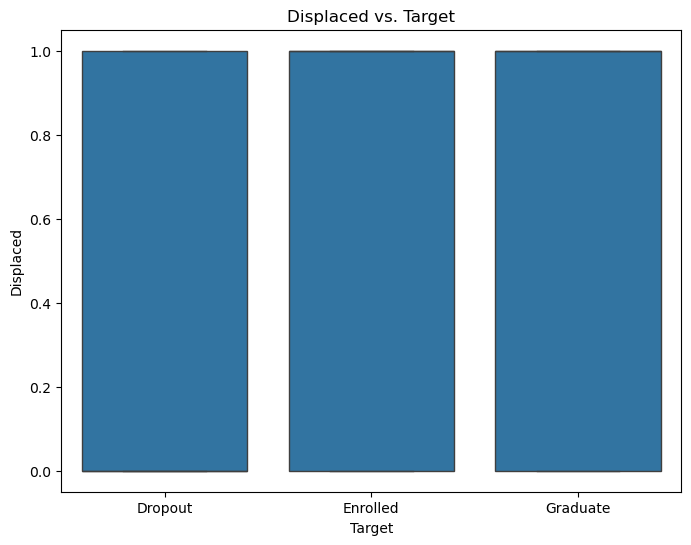

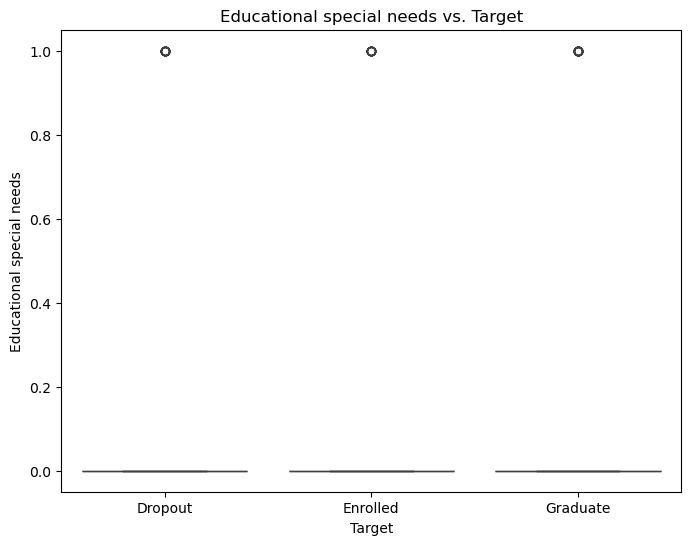

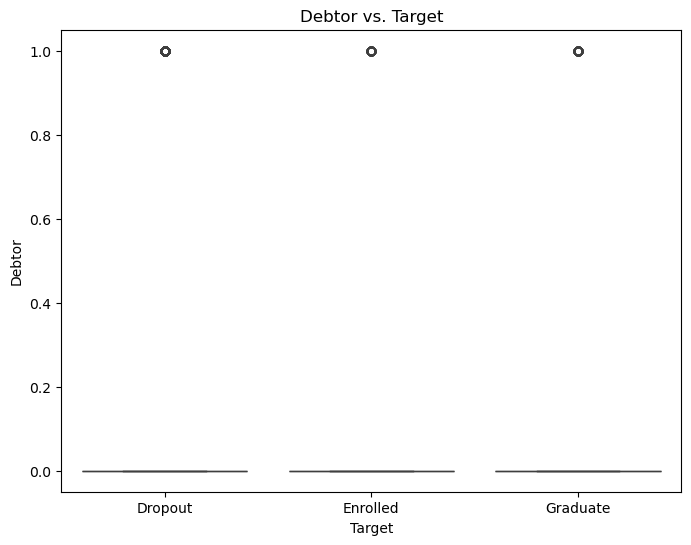

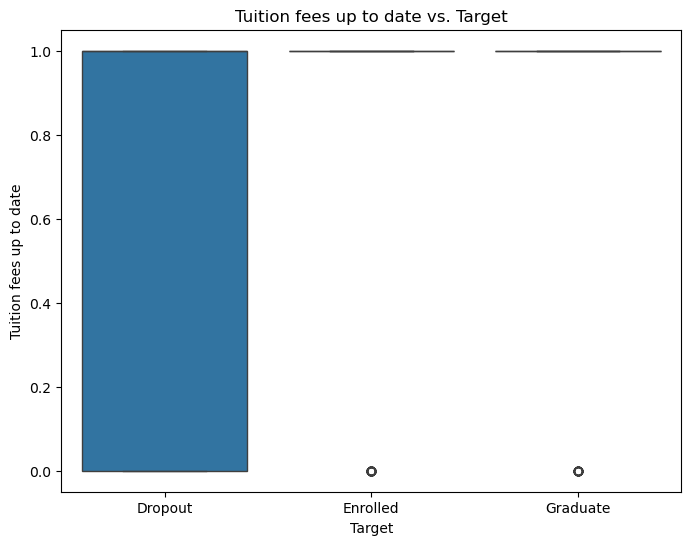

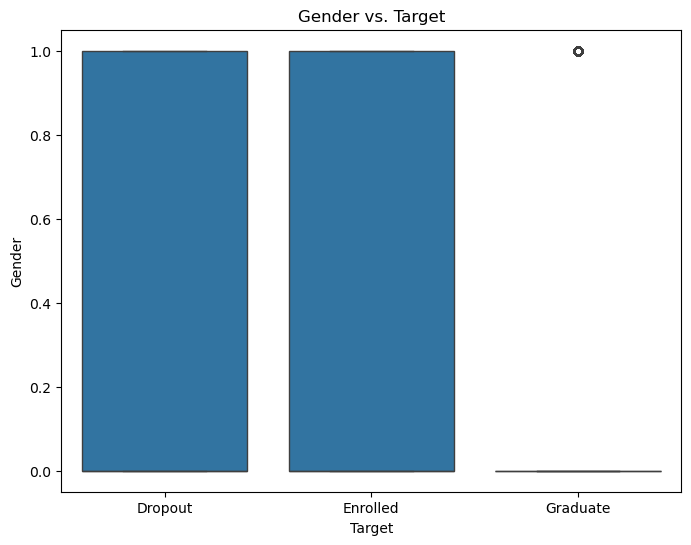

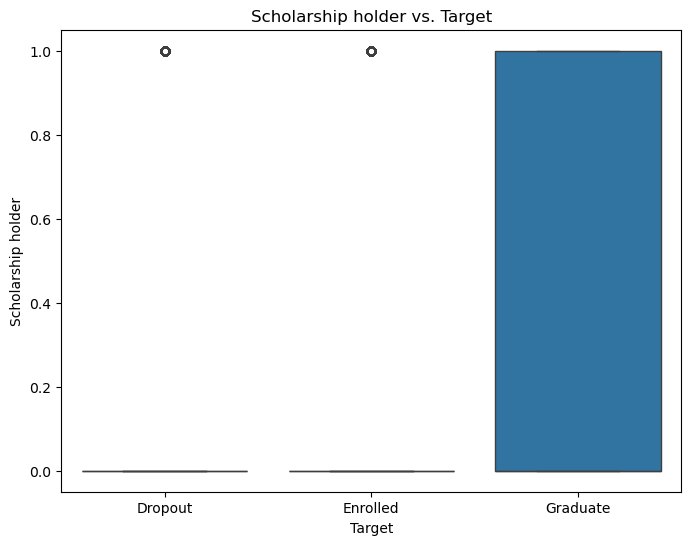

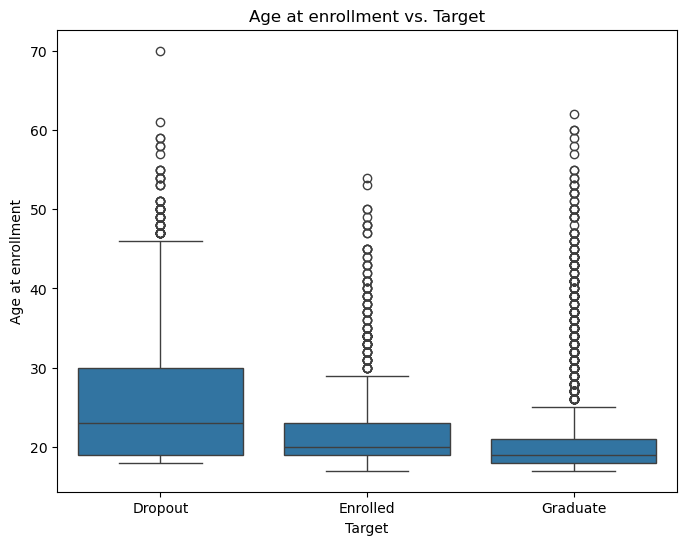

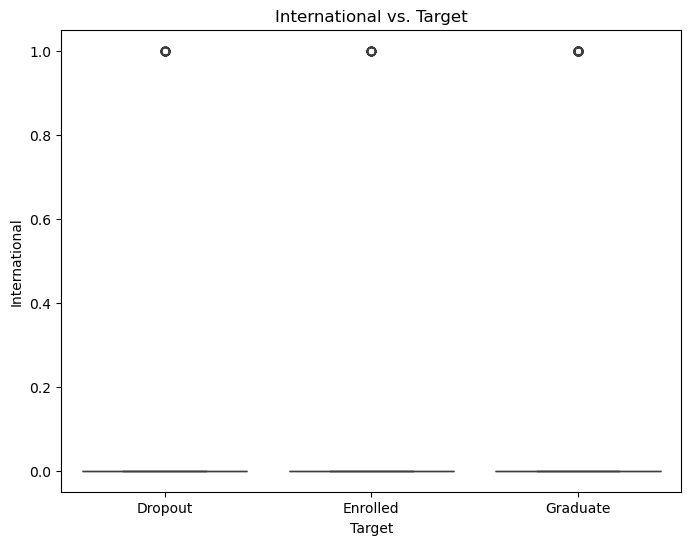

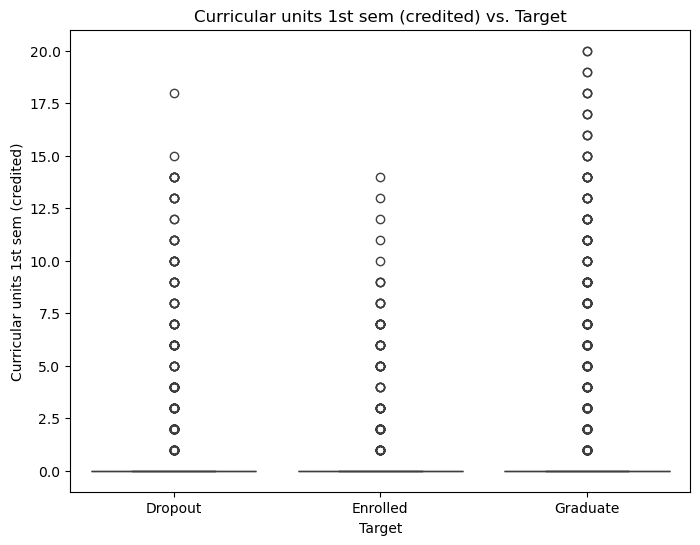

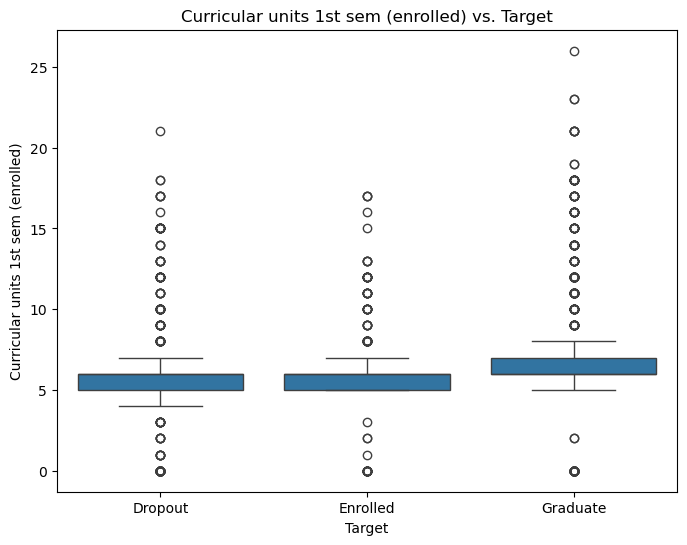

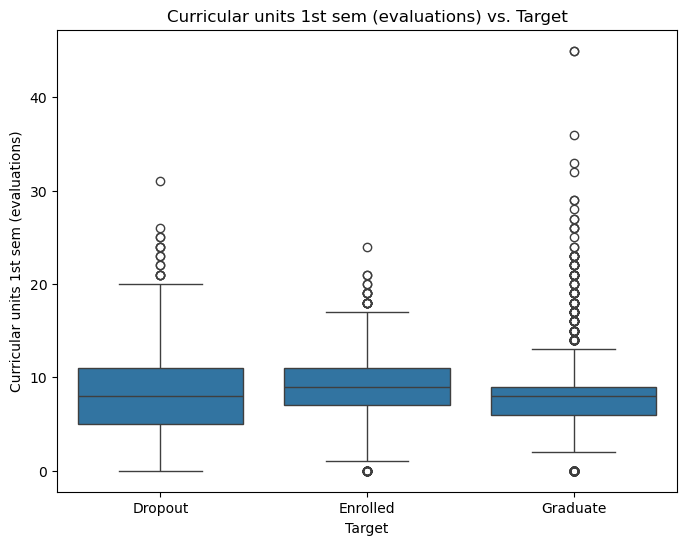

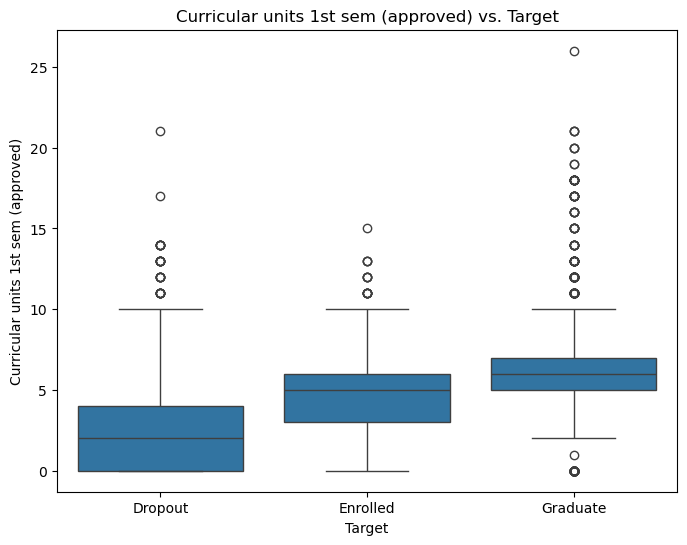

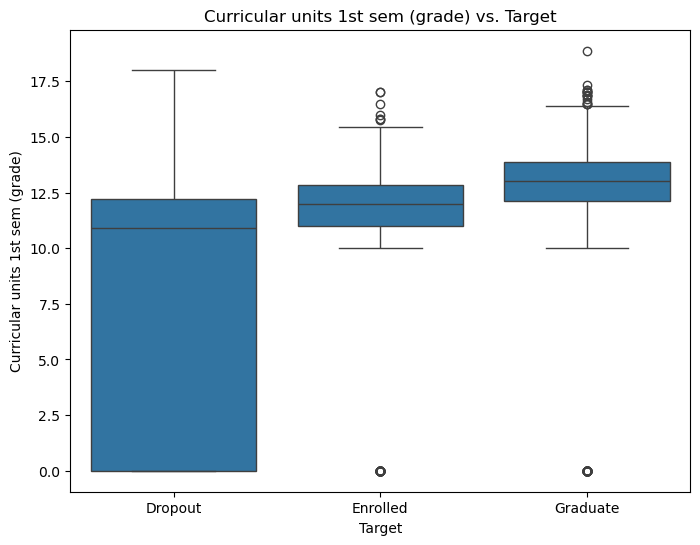

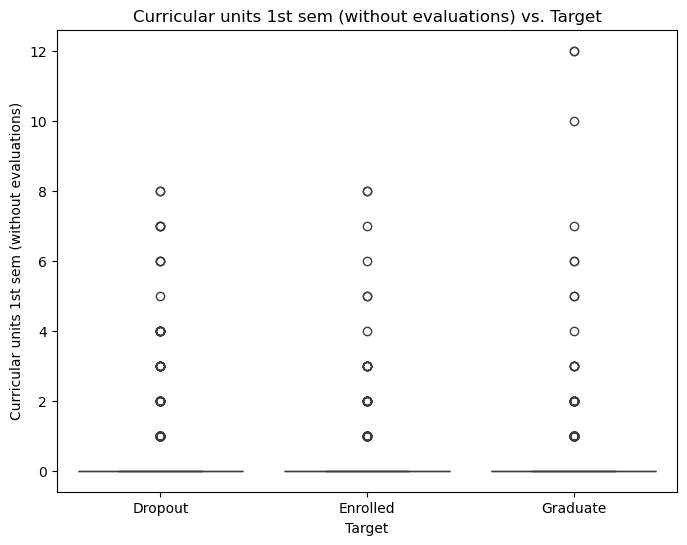

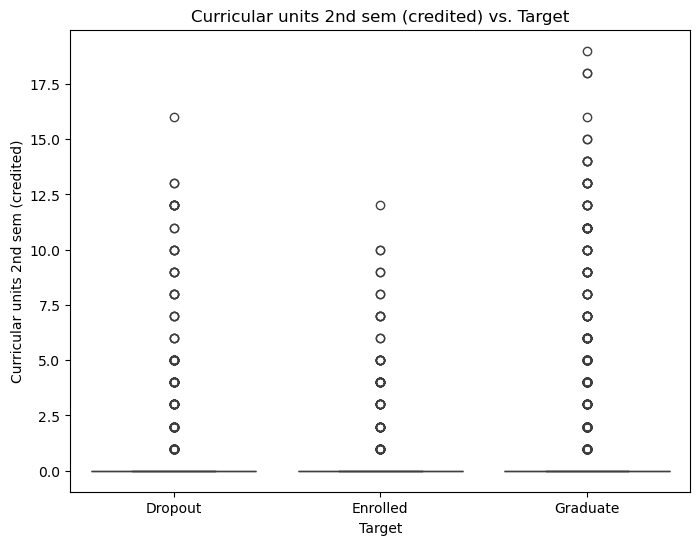

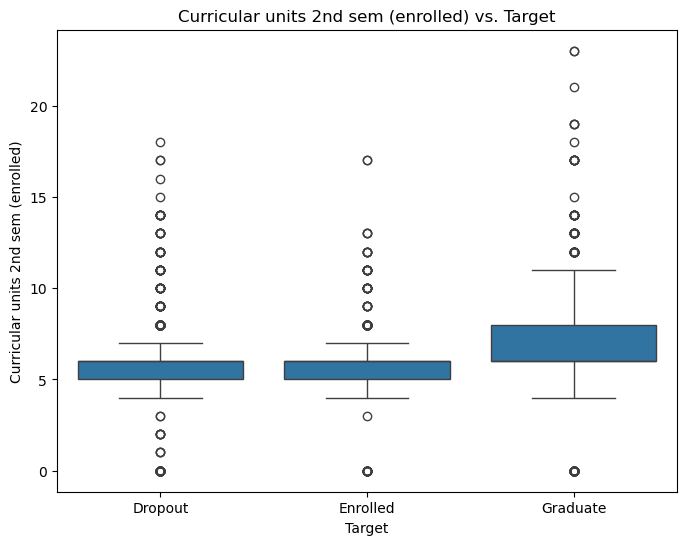

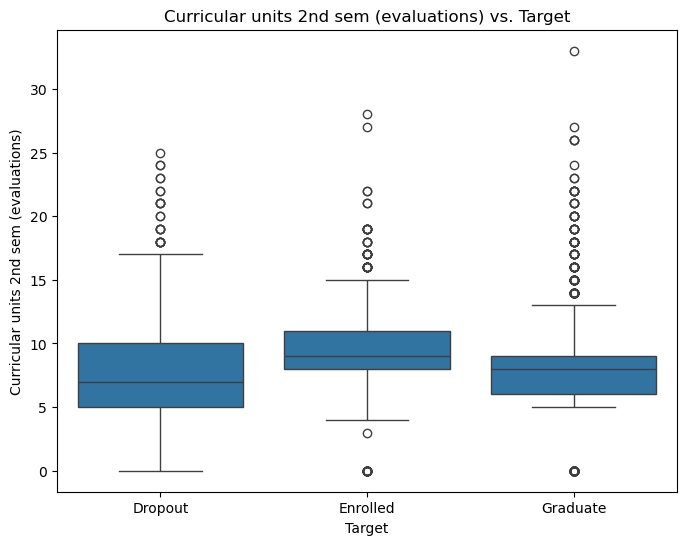

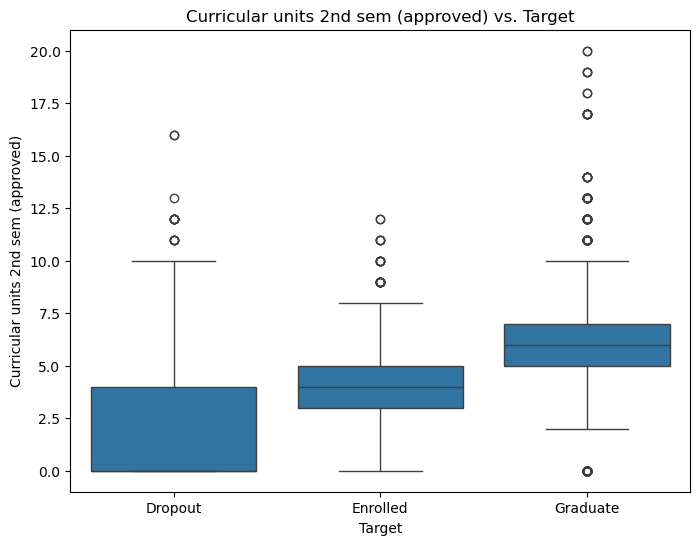

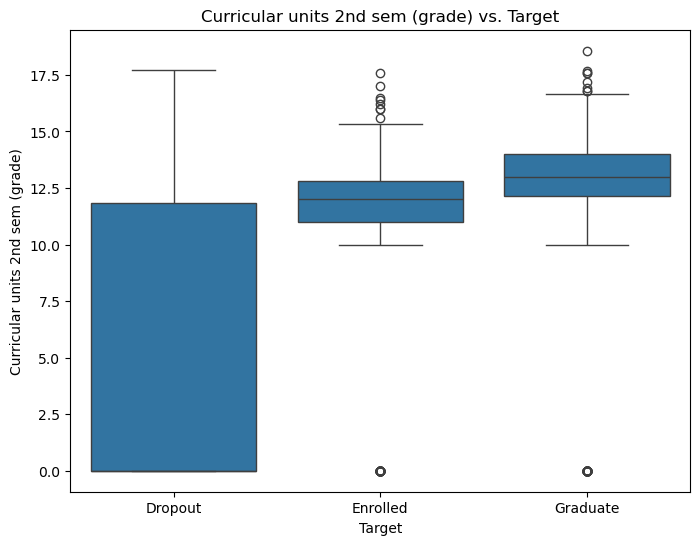

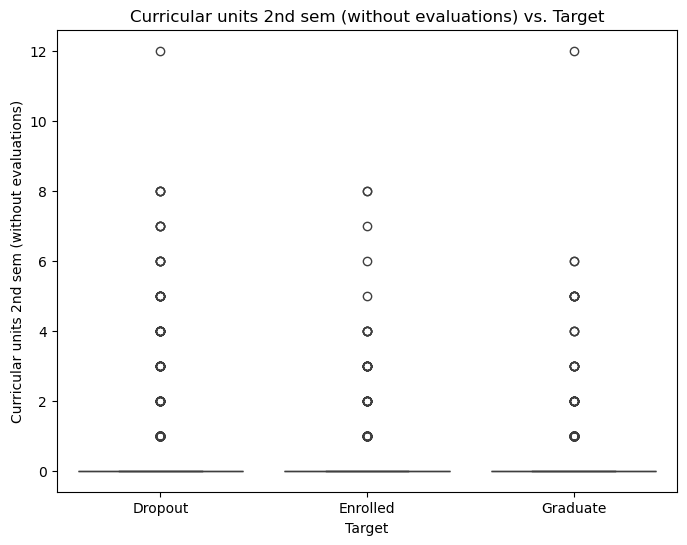

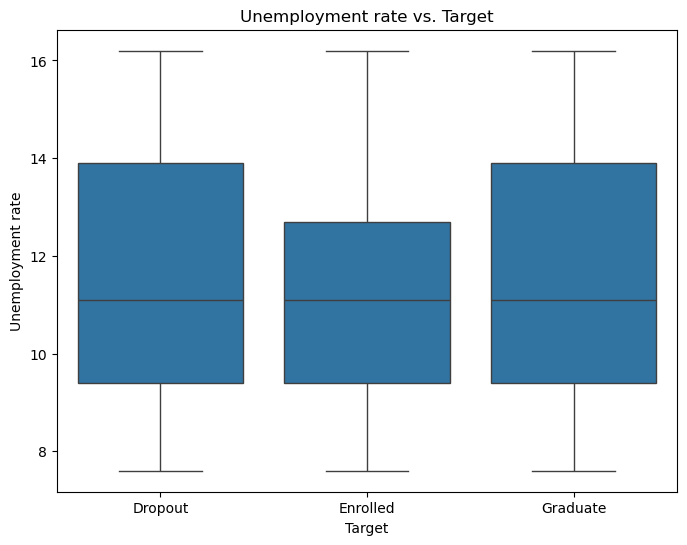

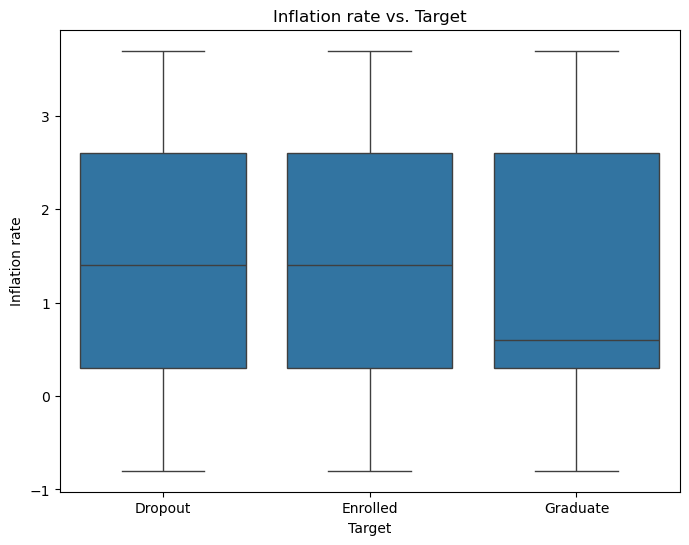

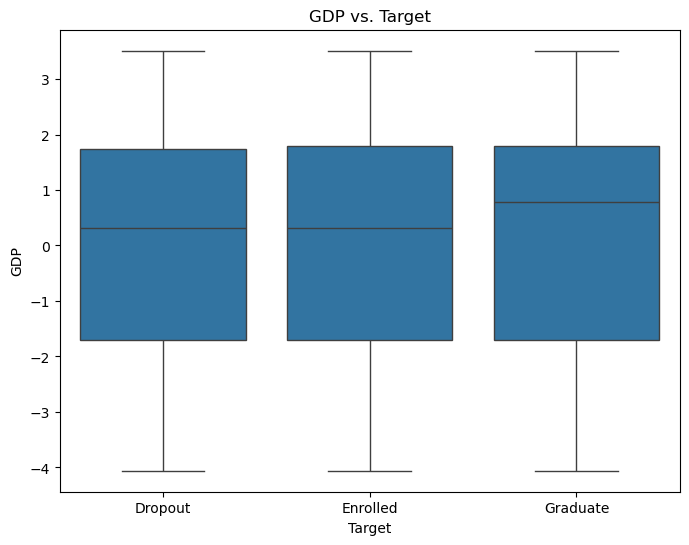

In [5]:
# Bivariate Analysis (assuming 'Target' is the target variable)
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    if col != 'Target':  # Exclude target variable from bivariate analysis
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Target', y=col, data=df)
        plt.title(f'{col} vs. Target')
        plt.xlabel('Target')
        plt.ylabel(col)
        plt.show()

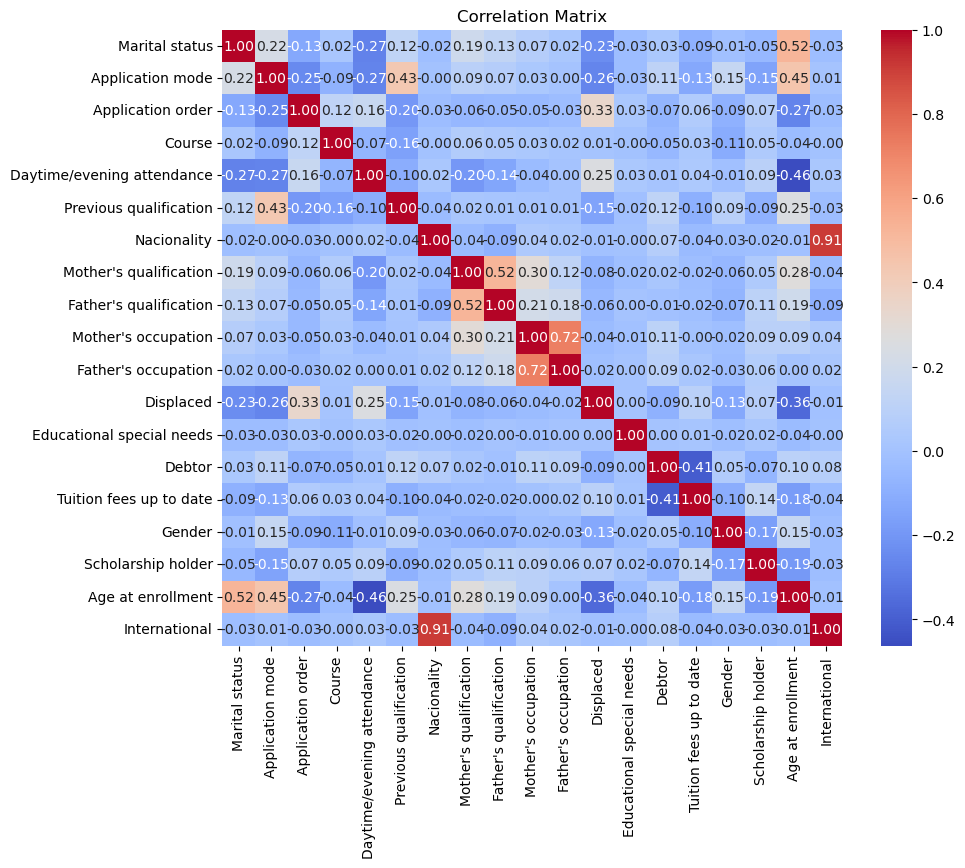

In [16]:
selected_features = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'Age at enrollment', 'International'
]

# Compute correlation matrix
correlation_matrix = df[selected_features].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


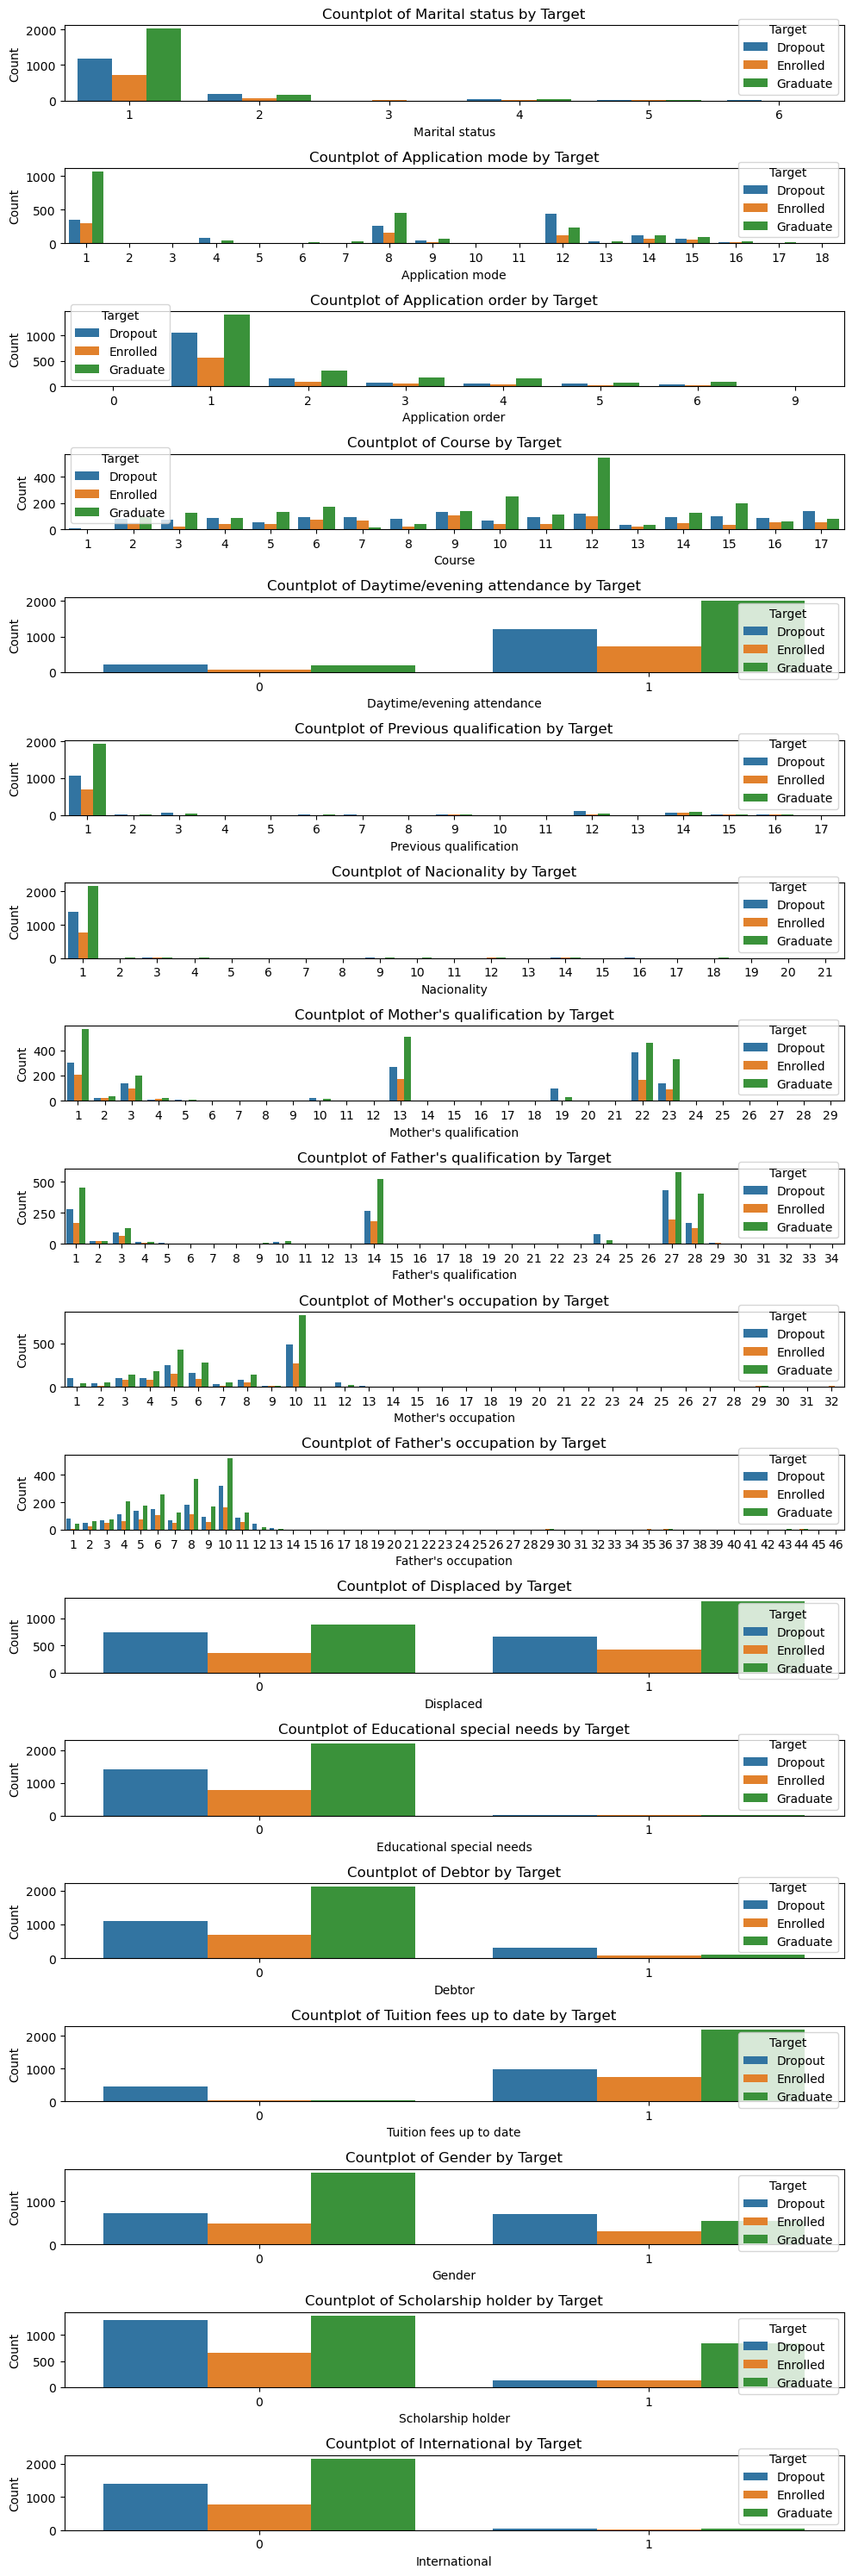

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'Target'

# Define the features you want to visualize
features_to_visualize = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'International'
]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(features_to_visualize), ncols=1, figsize=(10, 30))

# Iterate over features and create count plots
for feature, ax in zip(features_to_visualize, axes):
    sns.countplot(x=feature, hue=target_variable, data=df, ax=ax)
    ax.set_title(f'Countplot of {feature} by {target_variable}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target_variable)

plt.tight_layout()
plt.show()


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.75
              precision    recall  f1-score   support

     Dropout       0.81      0.78      0.80       316
    Enrolled       0.48      0.25      0.32       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885

Confusion Matrix:
[[248  19  49]
 [ 43  37  71]
 [ 14  21 383]]


/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

Decision Tree Accuracy: 0.6926553672316385
              precision    recall  f1-score   support

     Dropout       0.75      0.67      0.71       316
    Enrolled       0.37      0.39      0.38       151
    Graduate       0.77      0.82      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.70      0.69      0.69       885

Confusion Matrix:
[[211  57  48]
 [ 38  59  54]
 [ 31  44 343]]
Random Forest Accuracy: 0.768361581920904
              precision    recall  f1-score   support

     Dropout       0.85      0.74      0.79       316
    Enrolled       0.53      0.33      0.41       151
    Graduate       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.76      0.77      0.75       885

Confusion Matrix:
[[235  30  51]
 [ 34  50  67]
 [  8  15 395]]
SVM Accuracy: 0.728813559

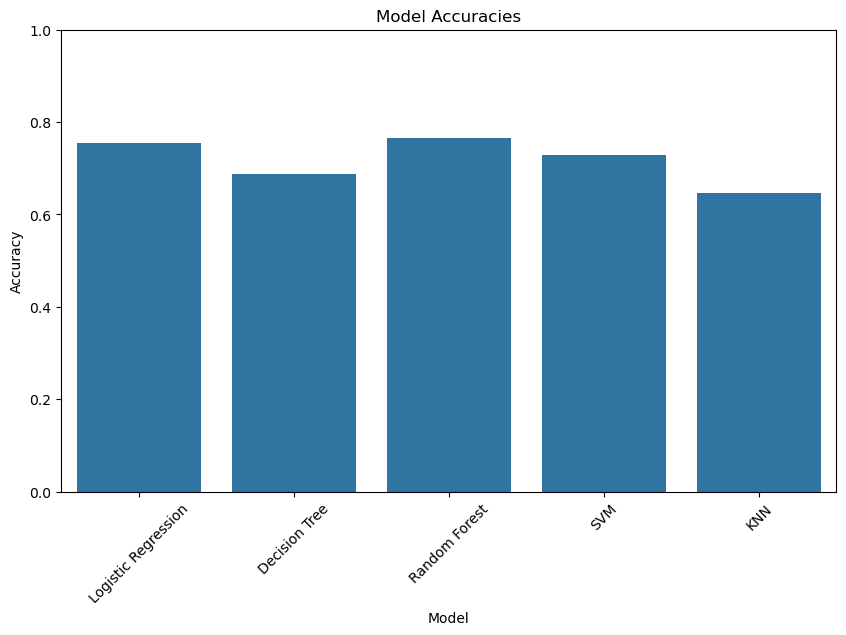

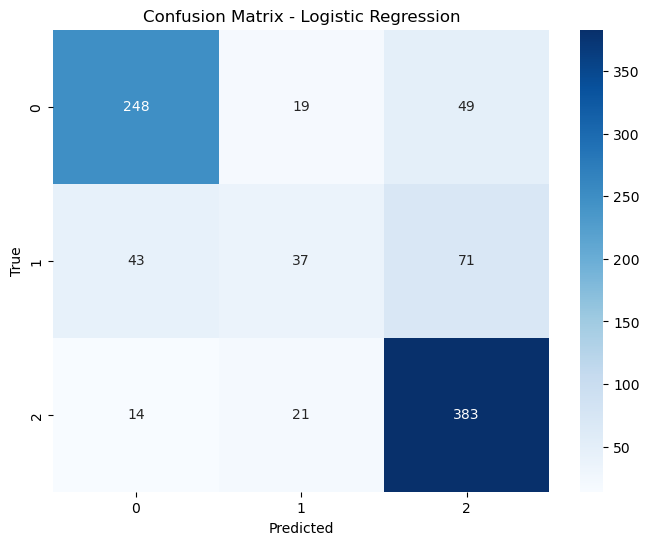

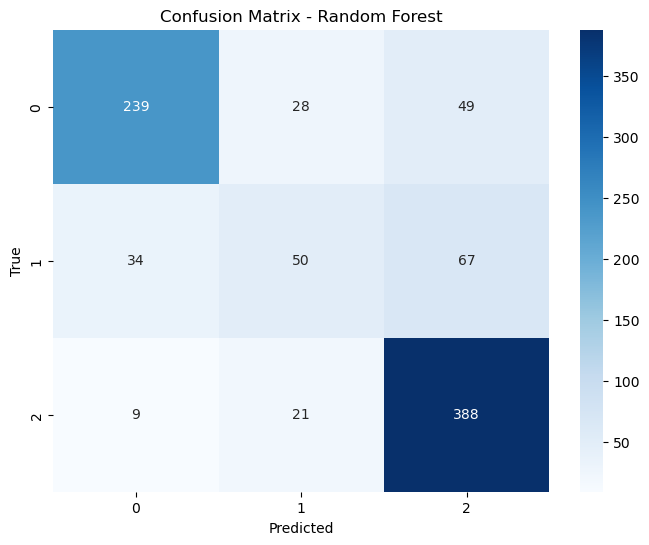

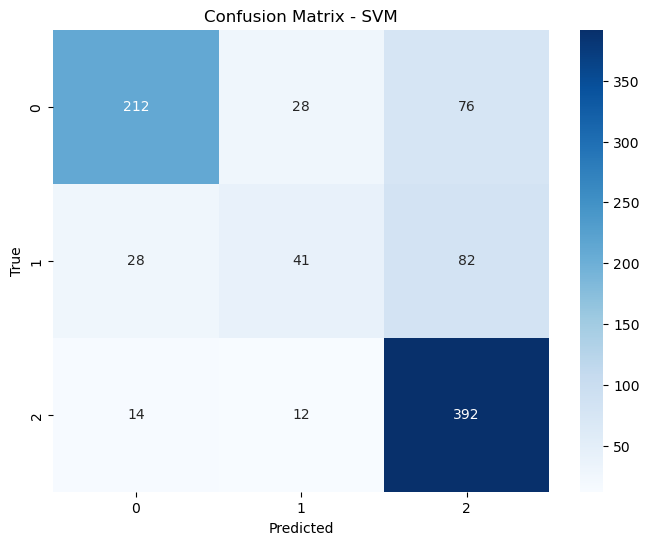

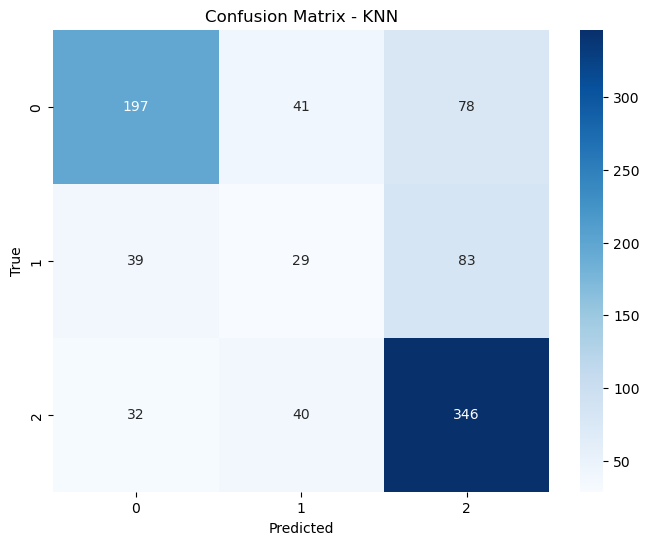

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Update the accuracies list
accuracies = [accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]

# Plot bar chart for model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()